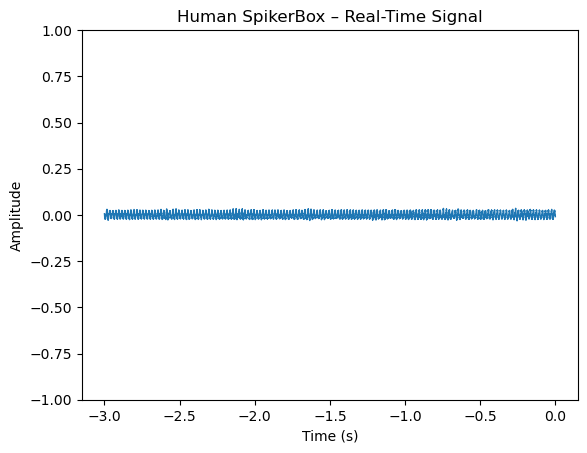

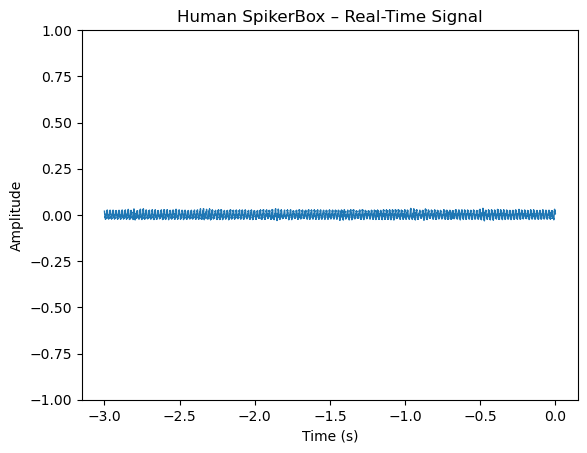

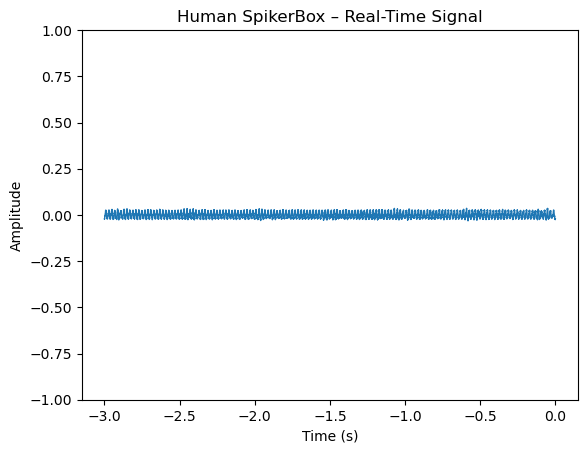

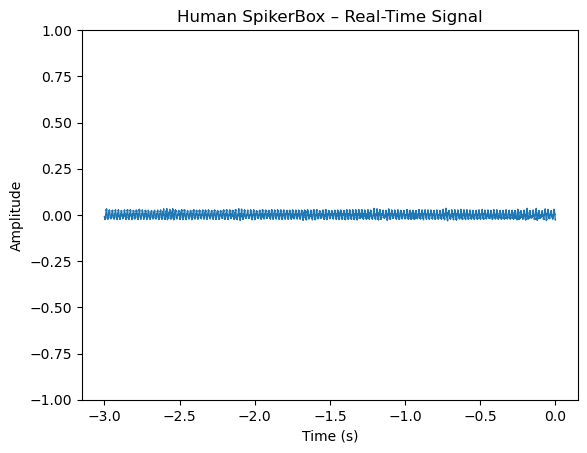

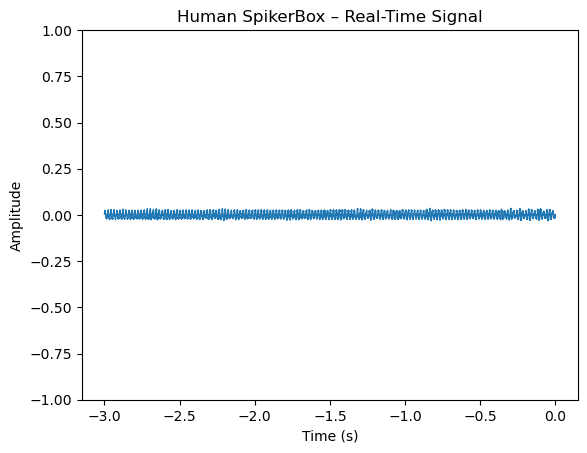

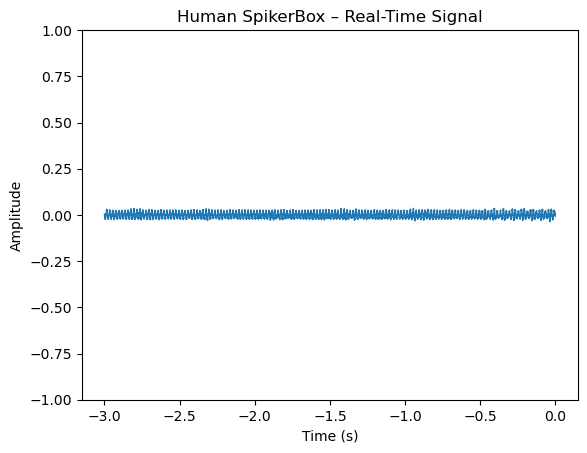

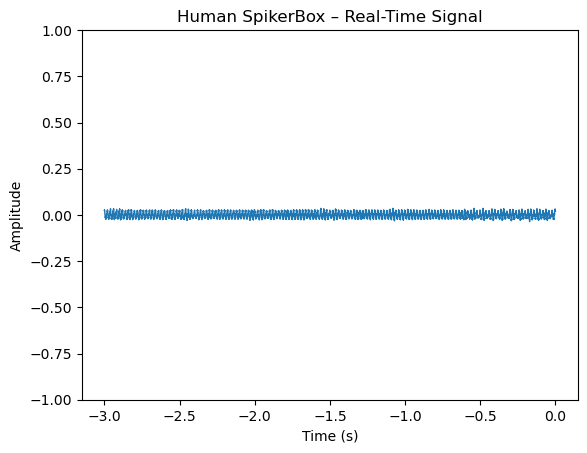

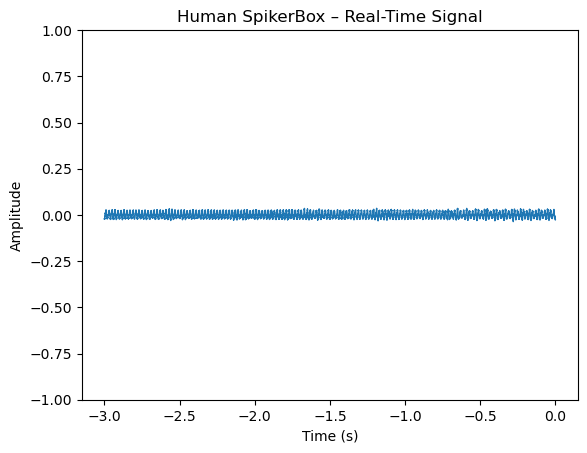

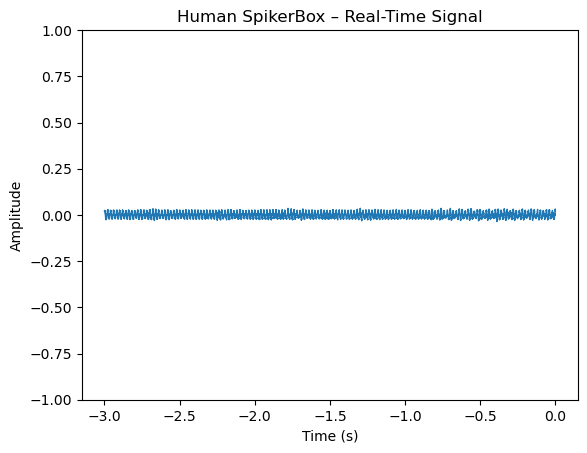

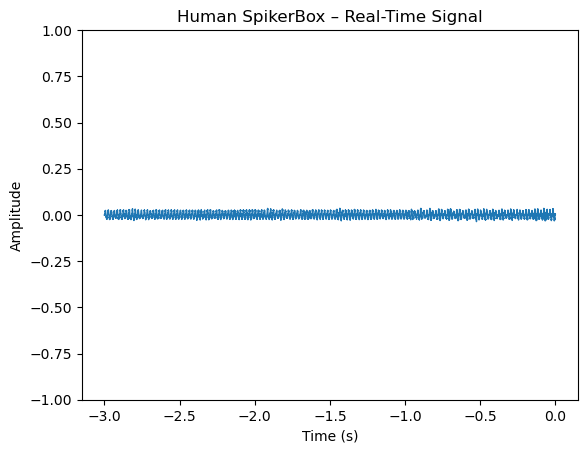

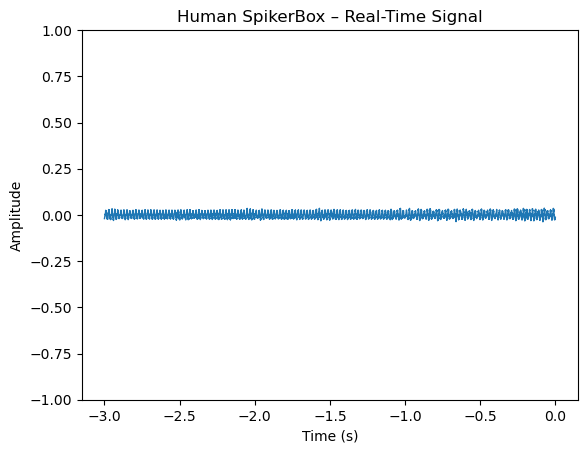

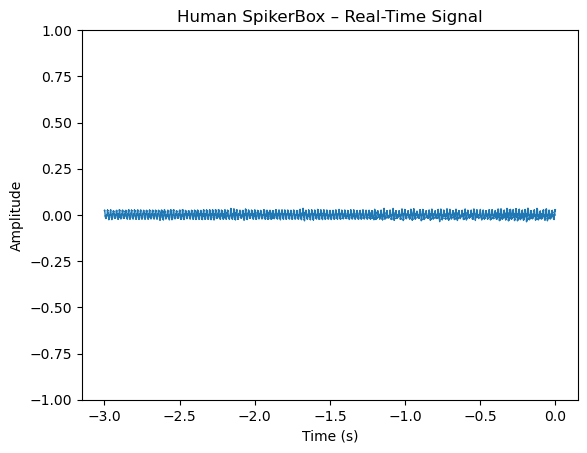

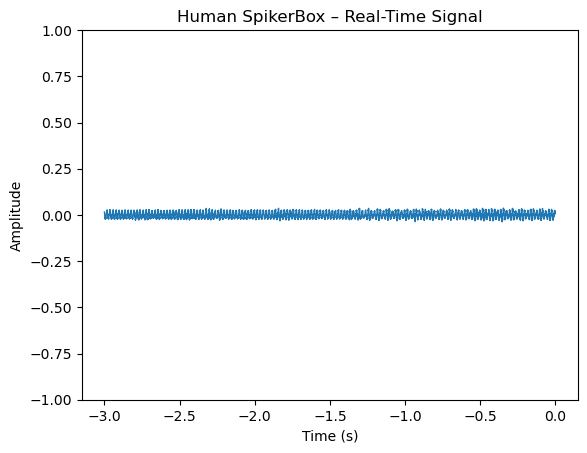

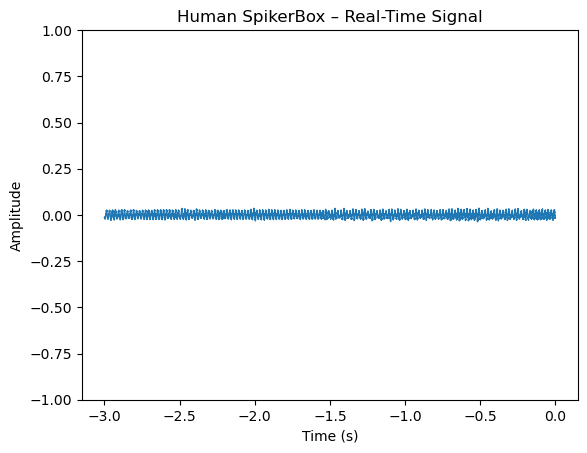

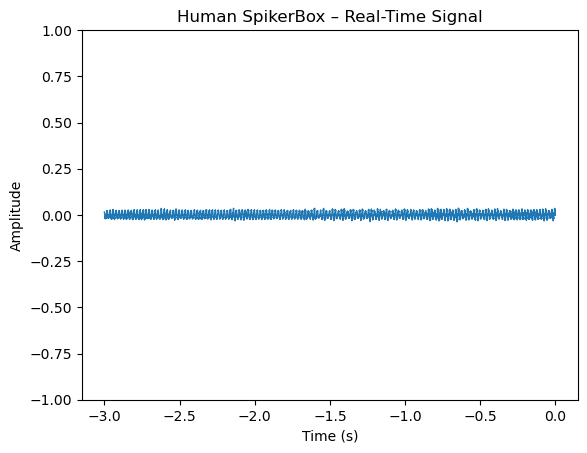

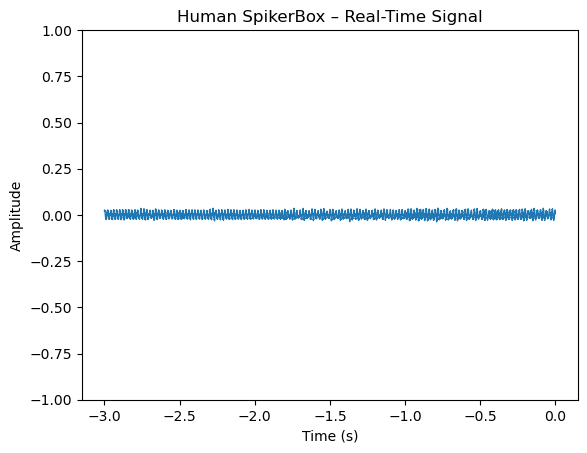

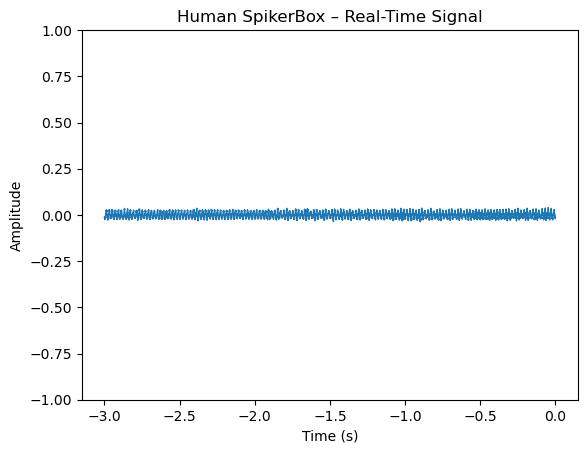

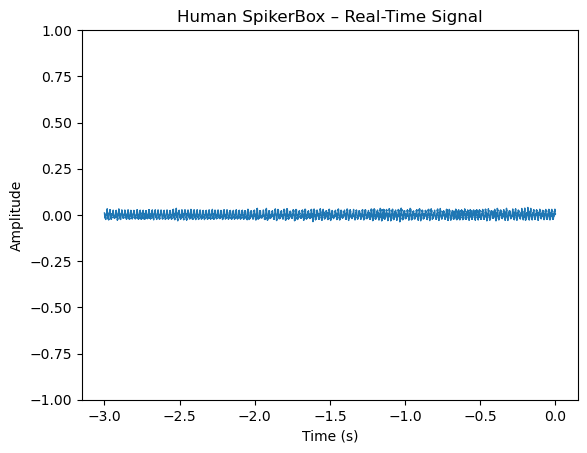

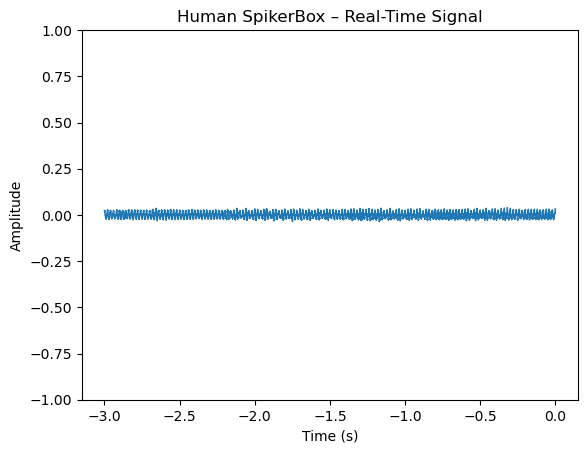

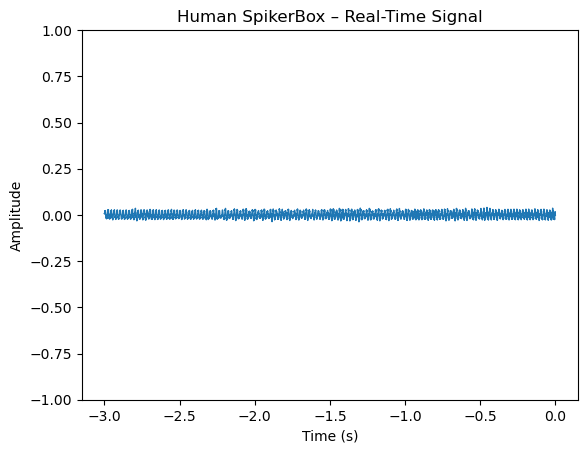

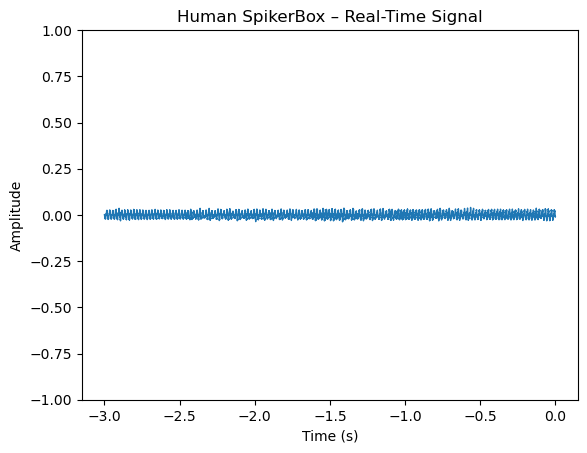

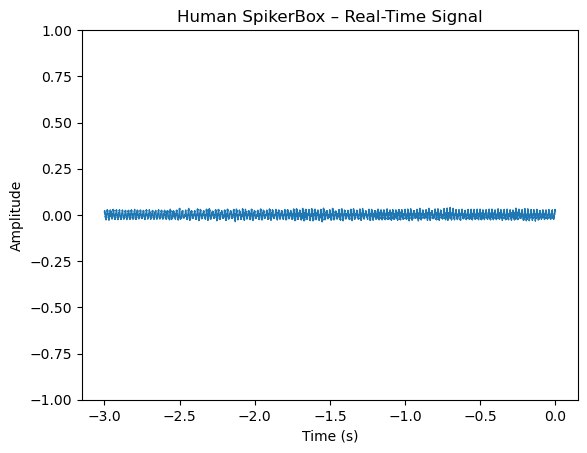

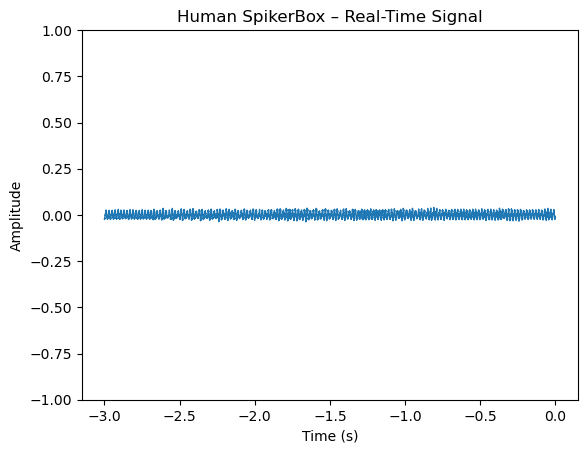

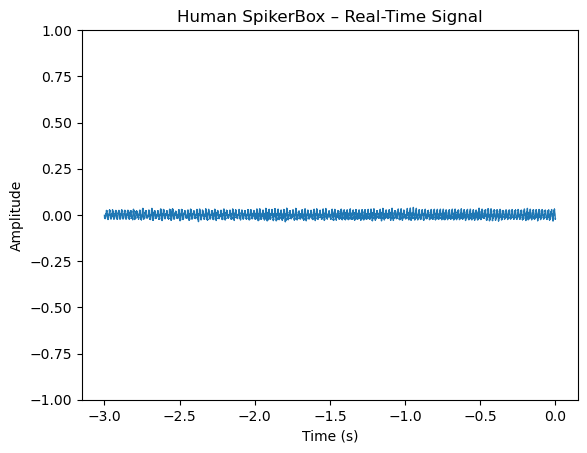

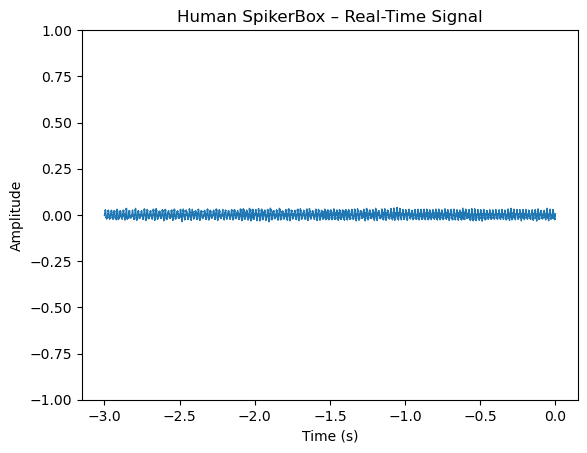

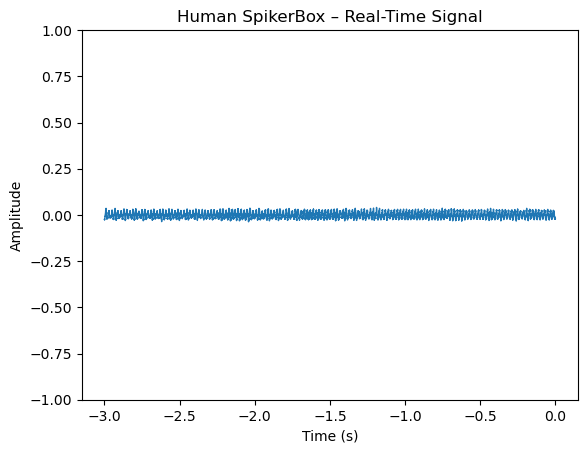

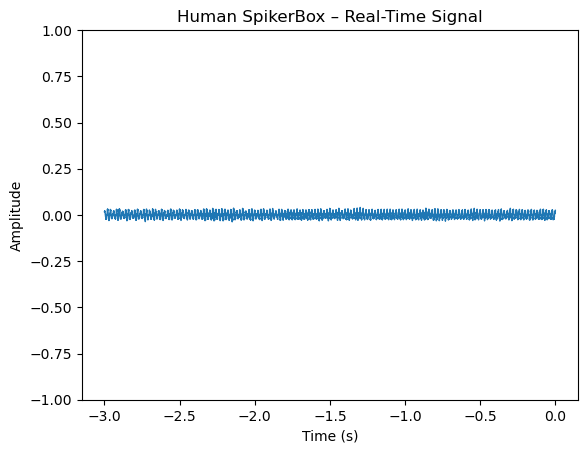

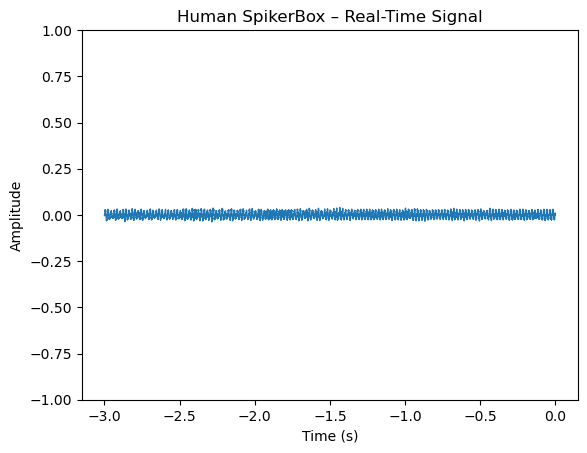

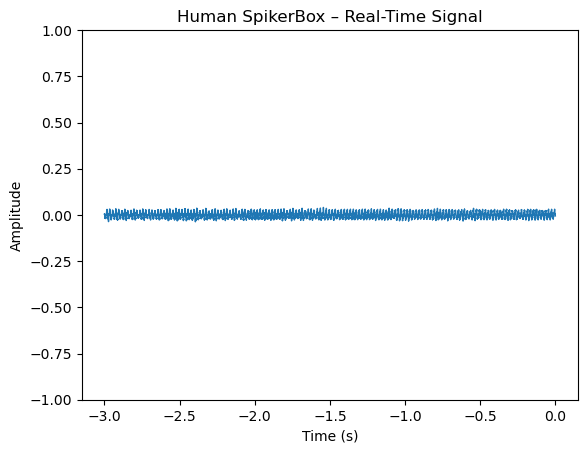

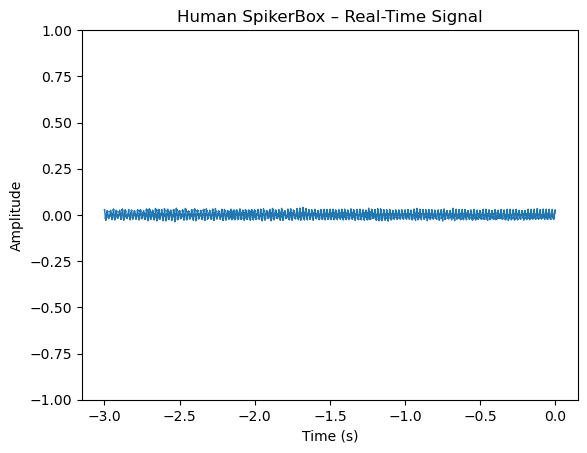

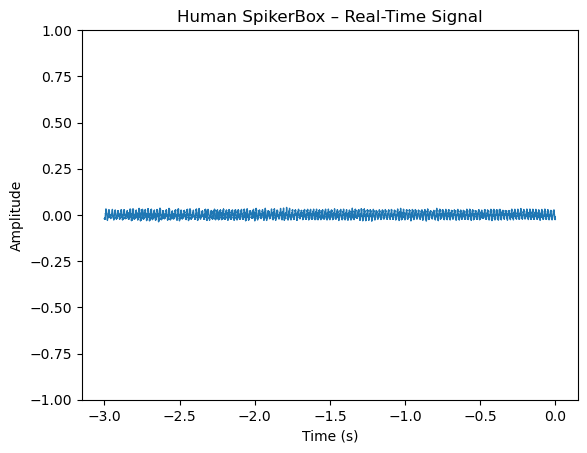

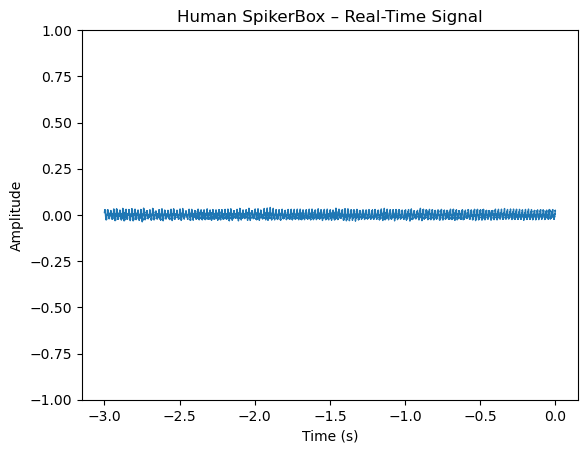

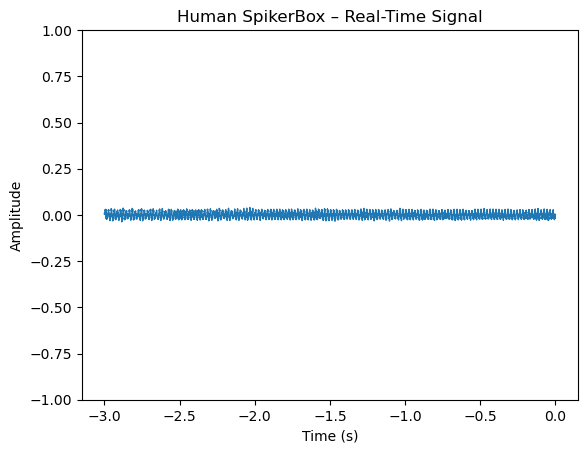

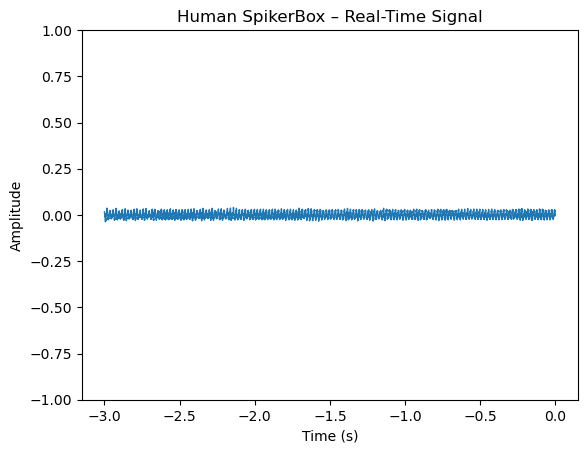

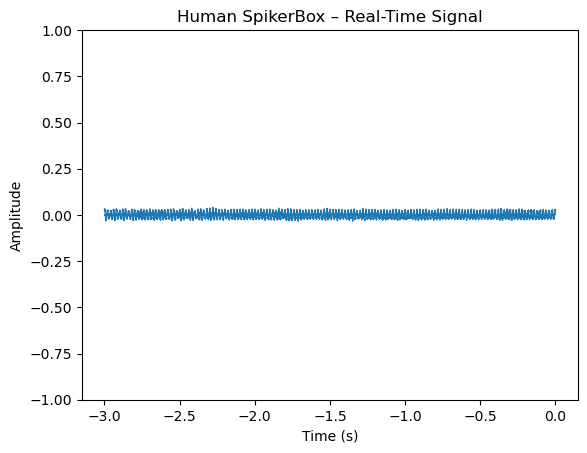

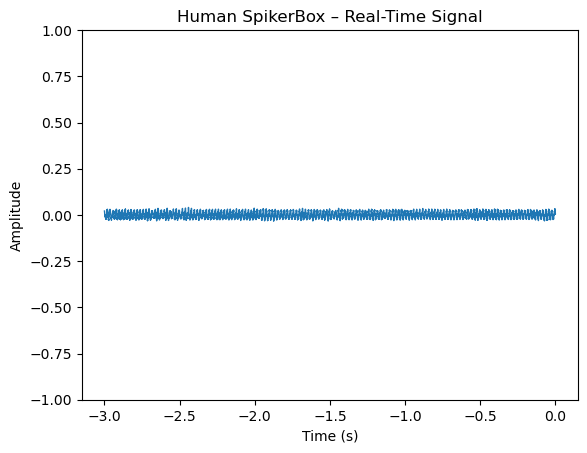

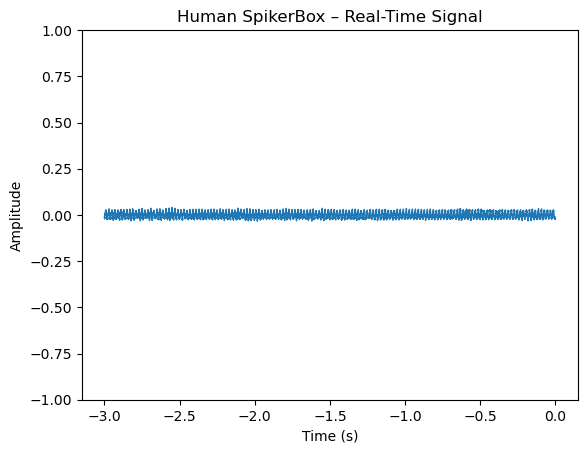

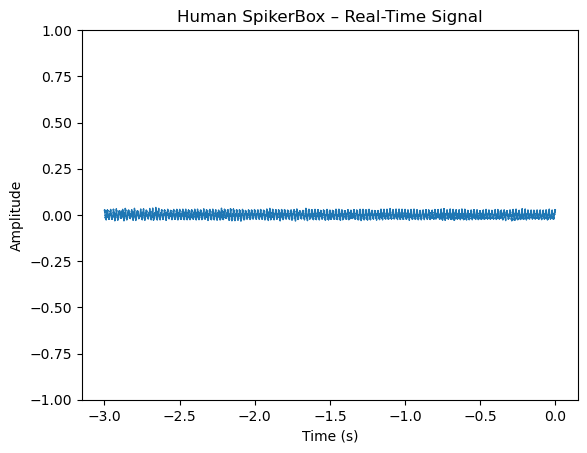

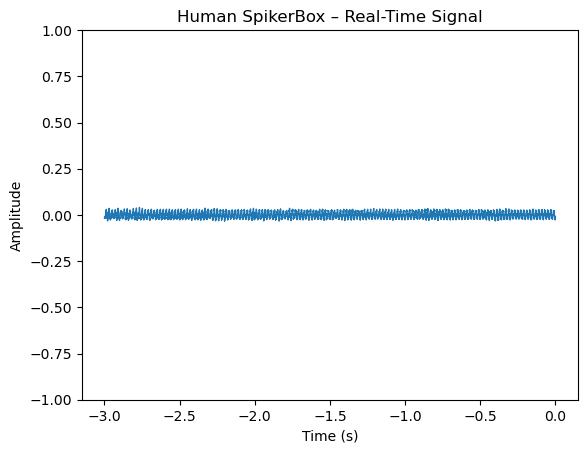

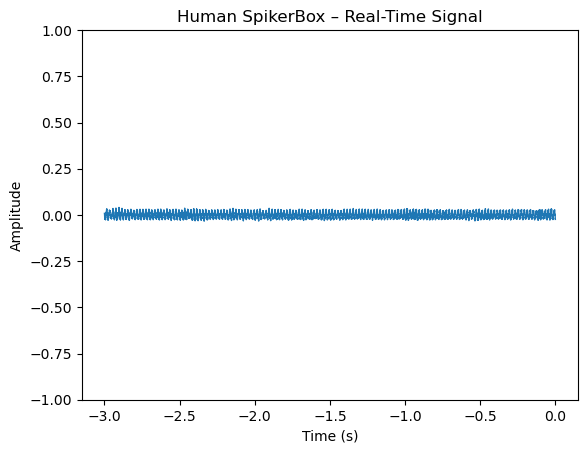

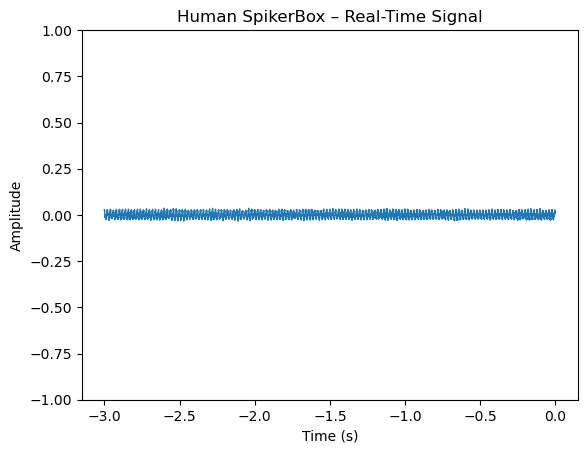

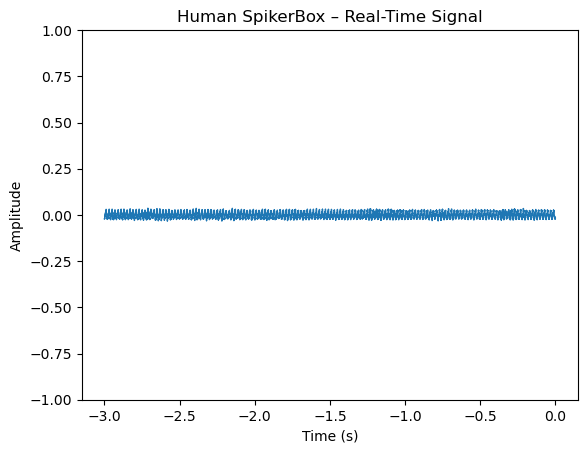

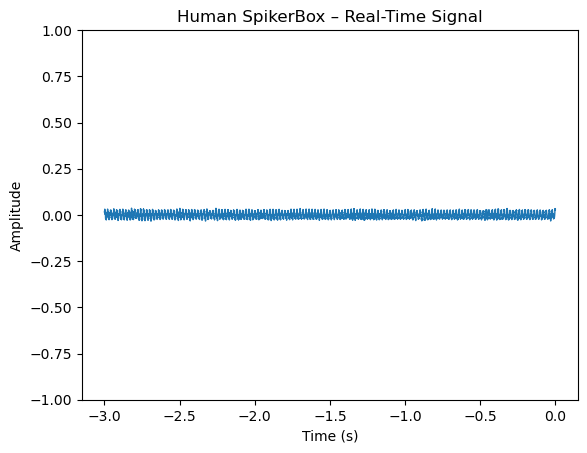

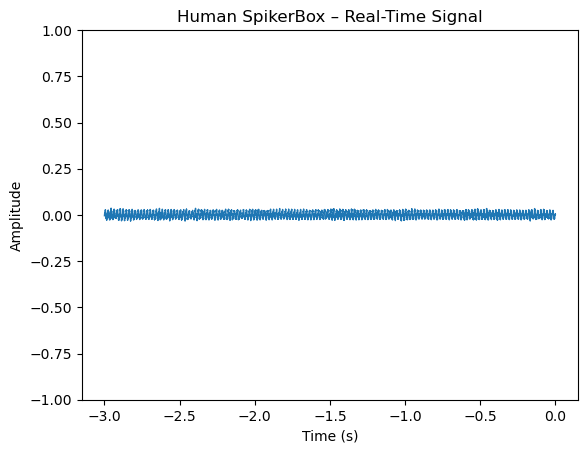

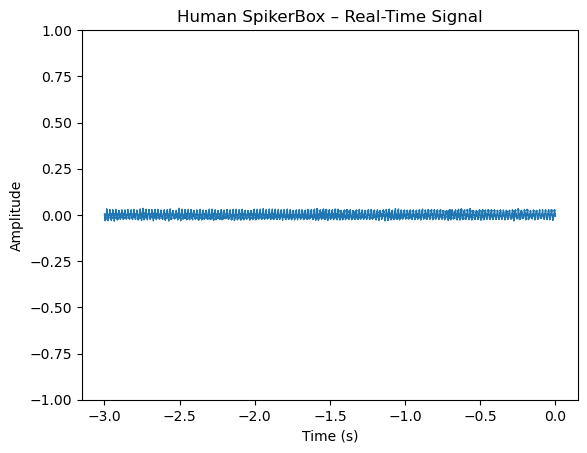

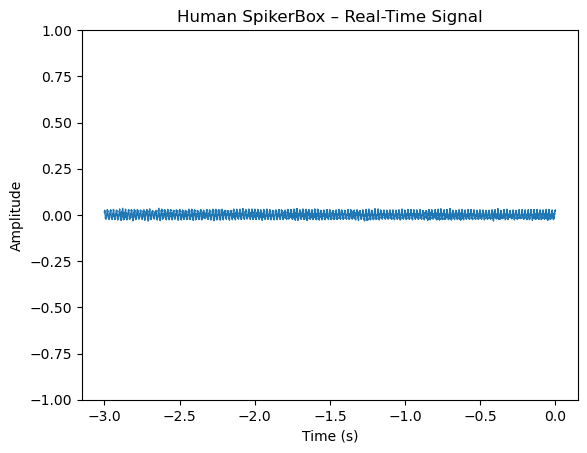

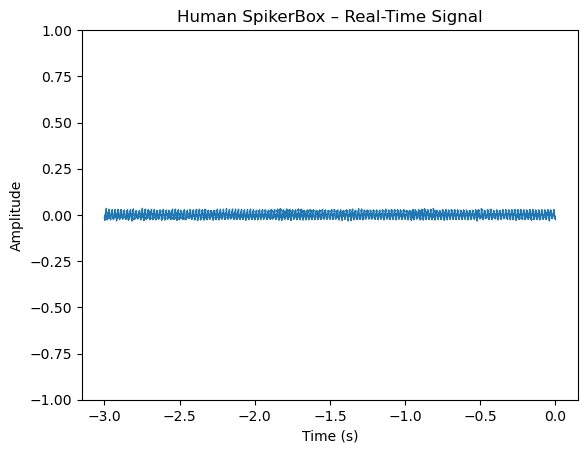

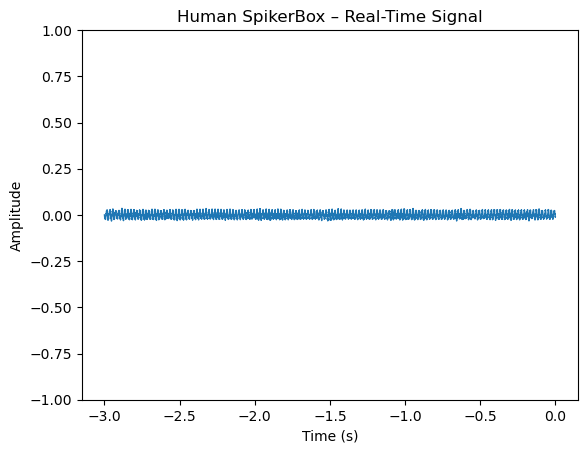

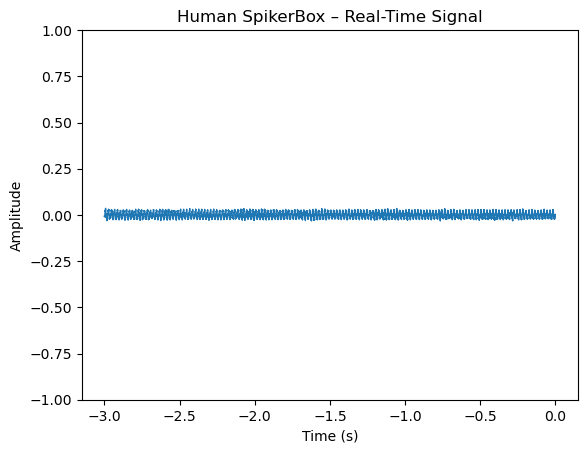

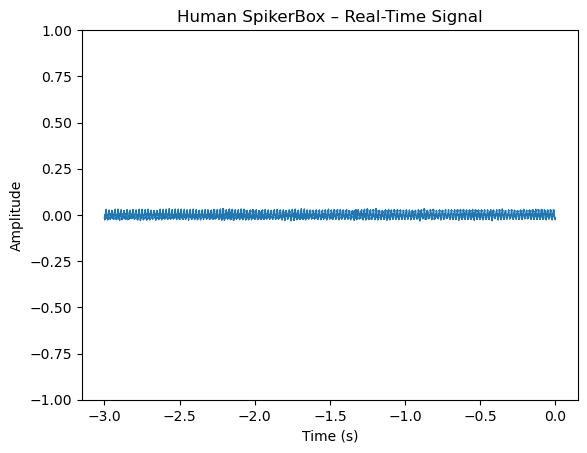

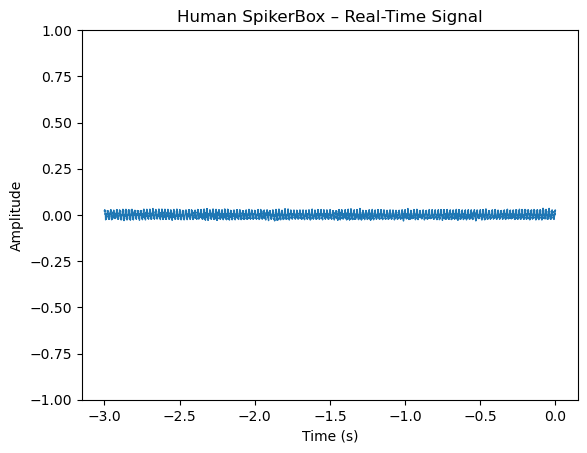

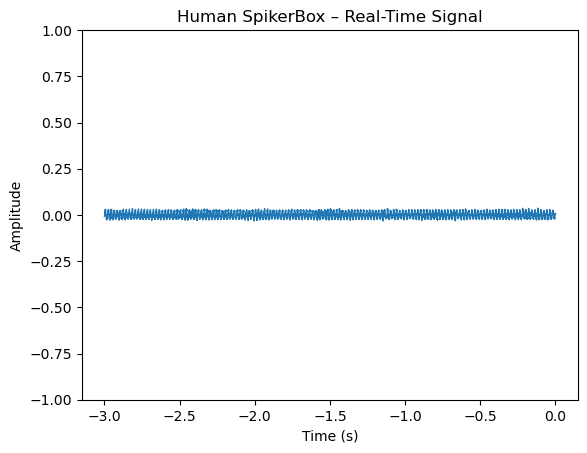

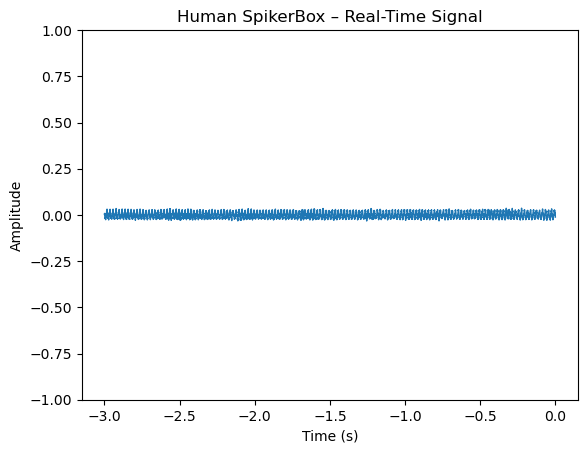

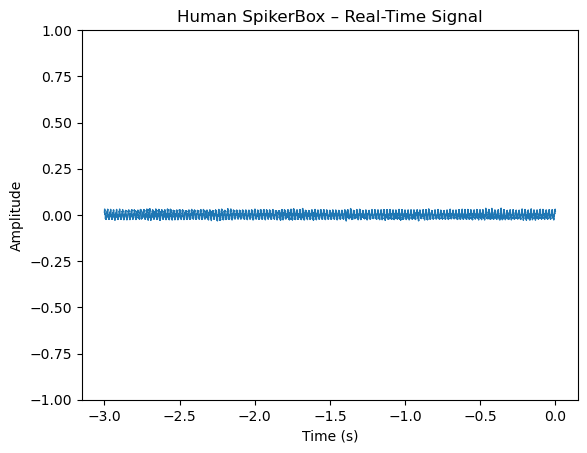

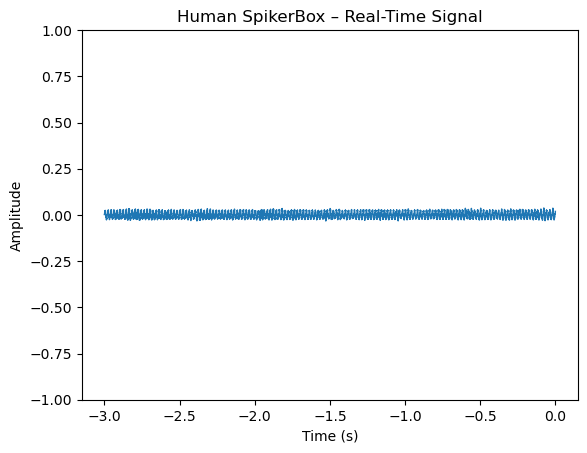

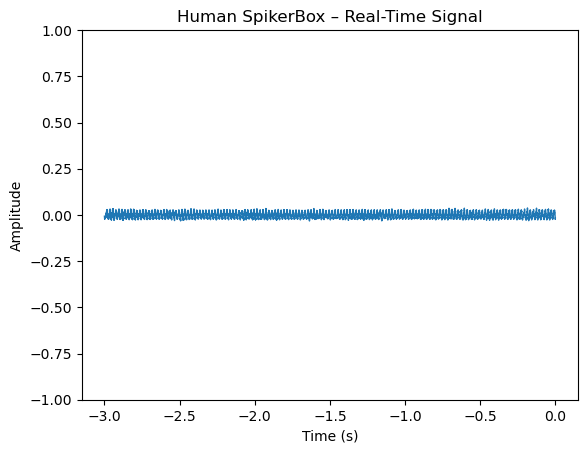

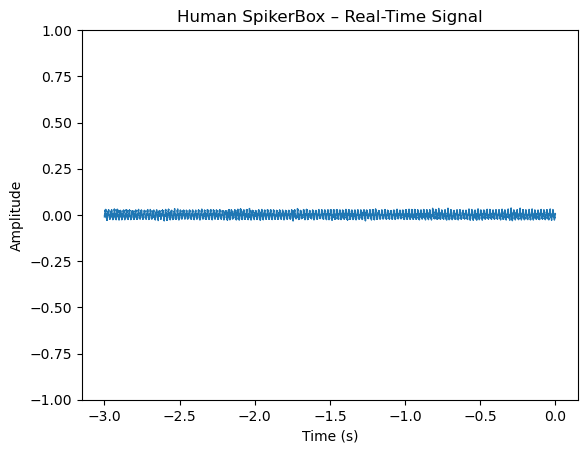

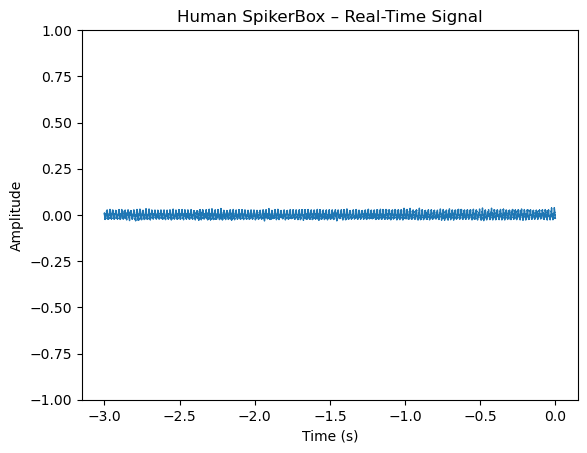

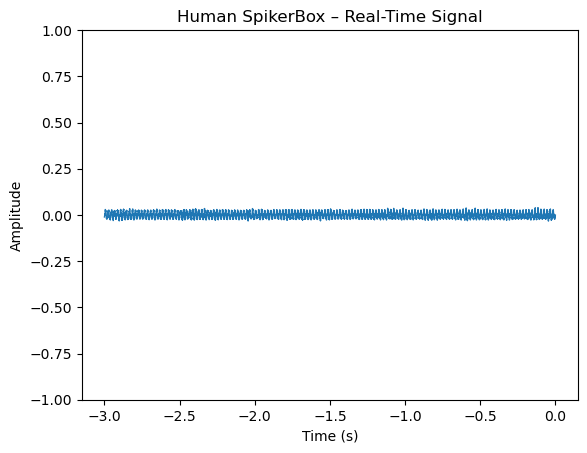

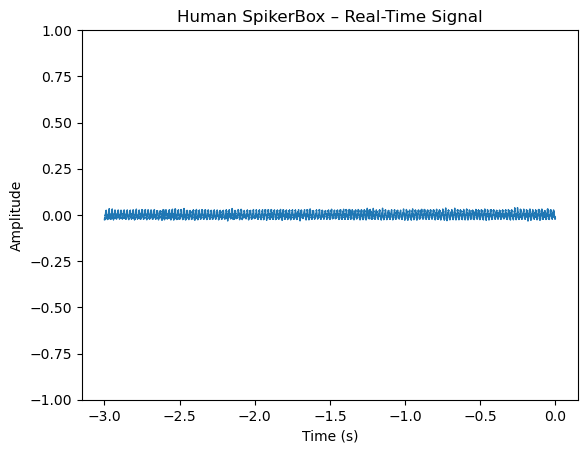

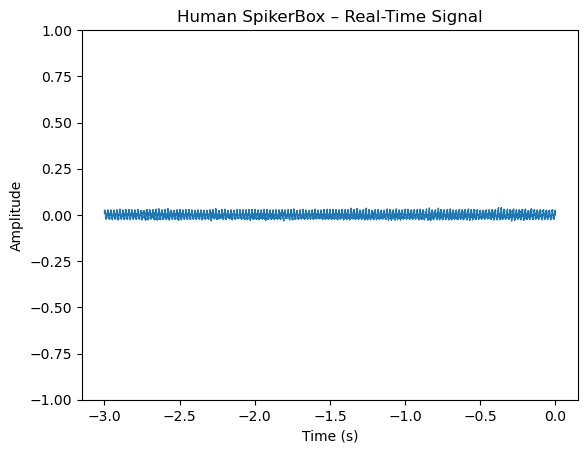

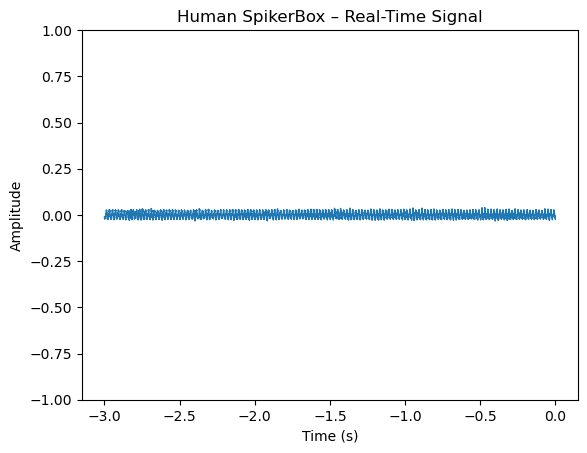

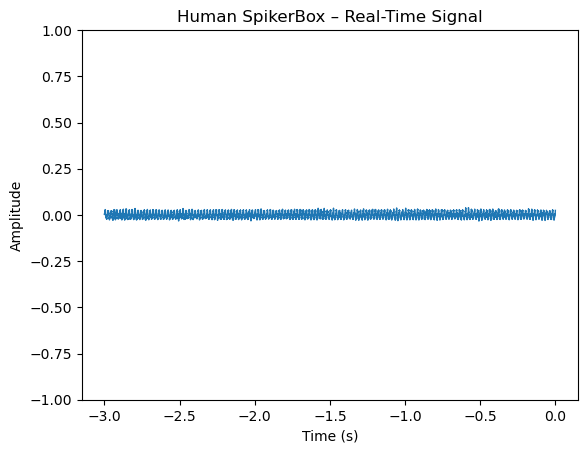

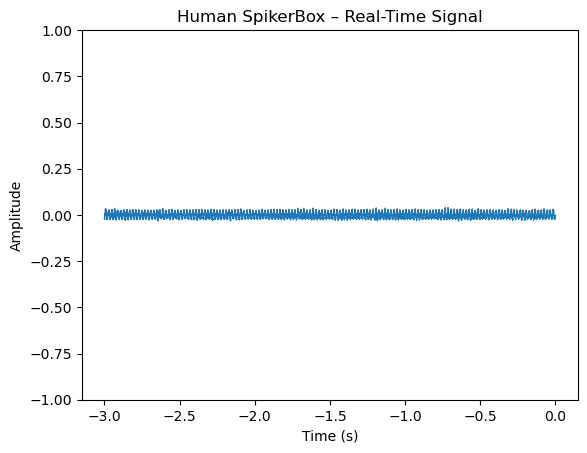

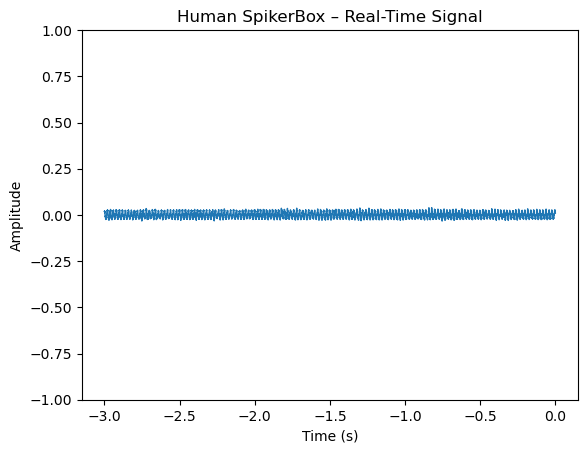

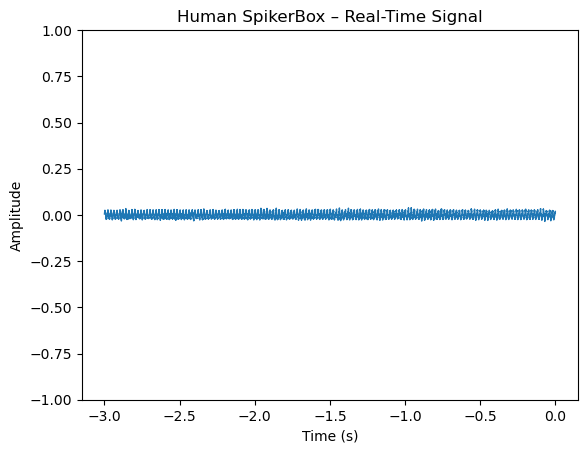

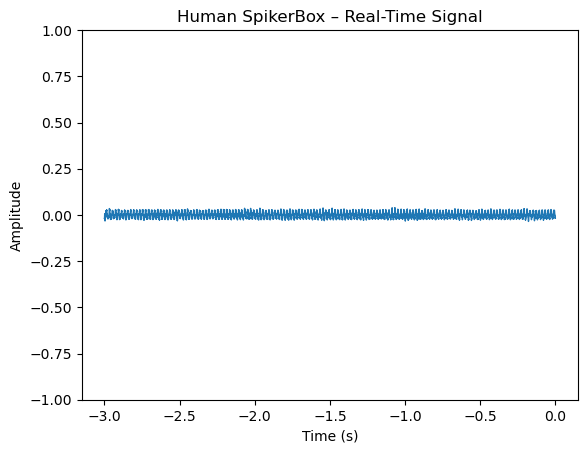

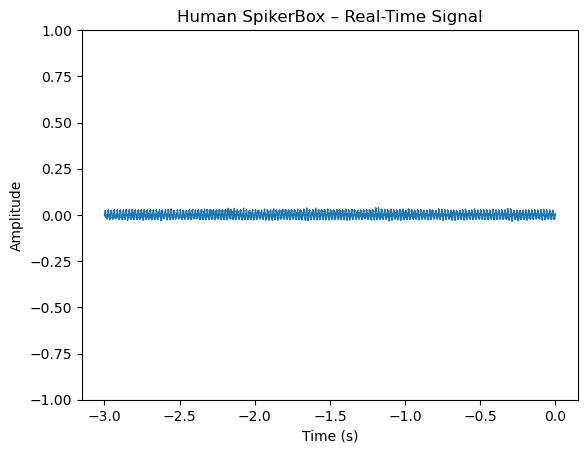

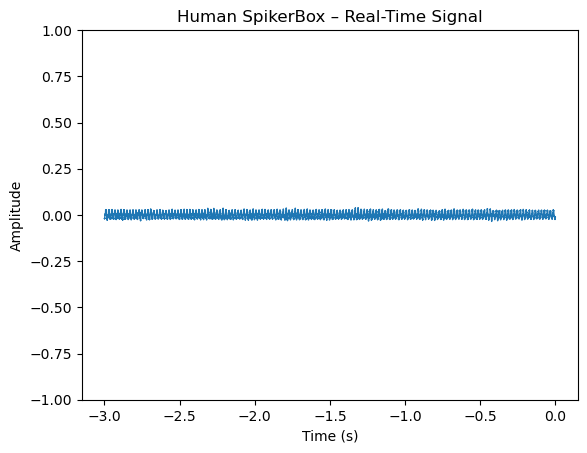

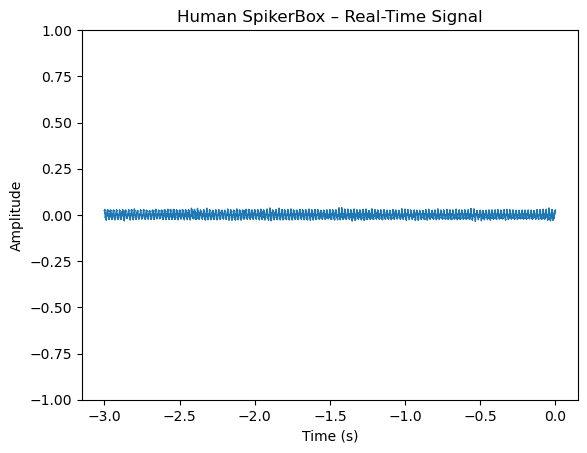

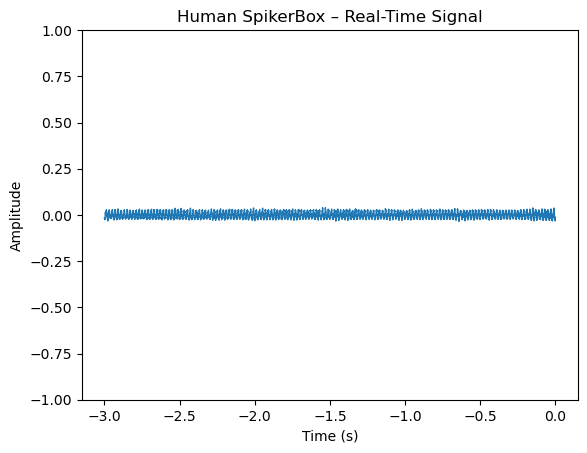

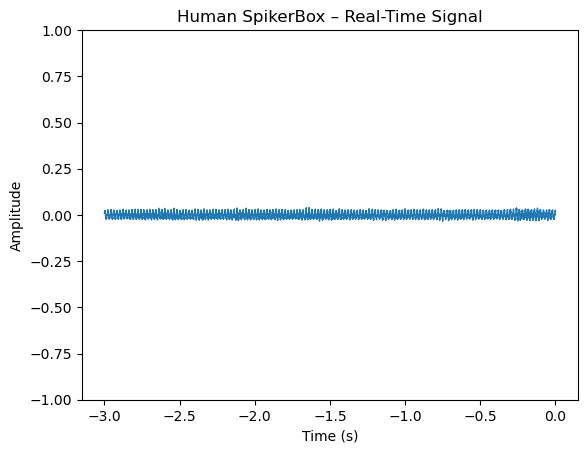

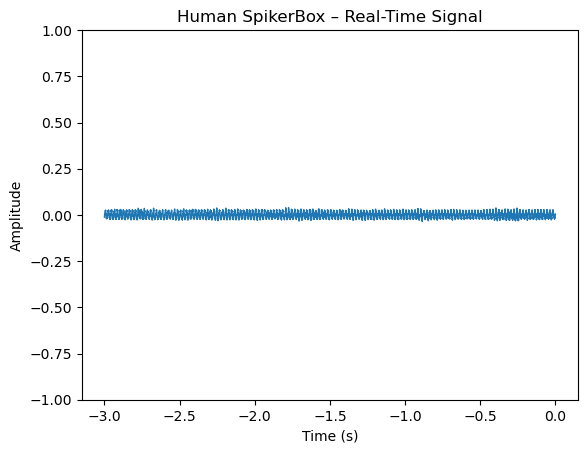

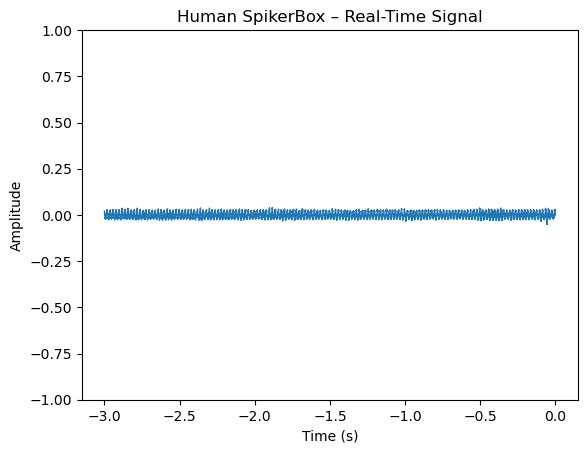

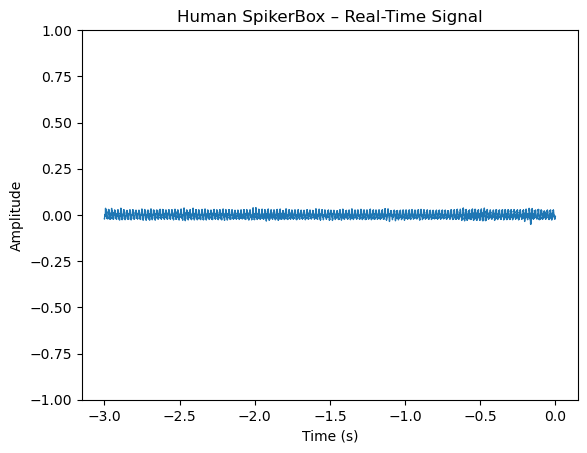

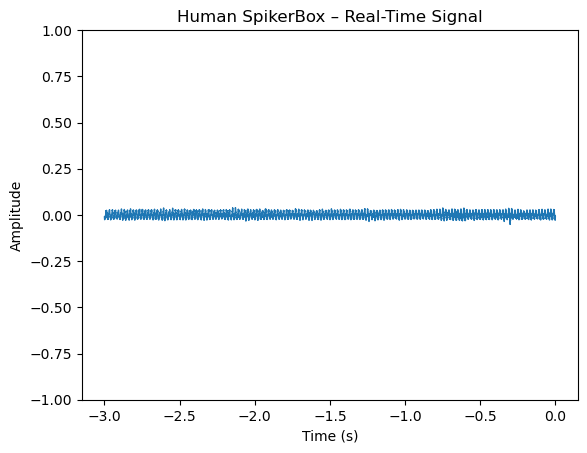

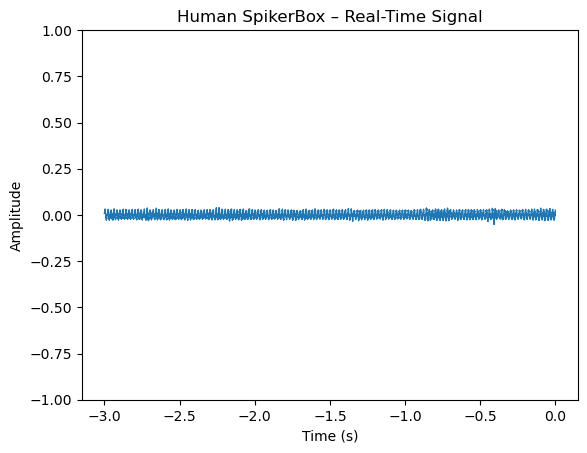

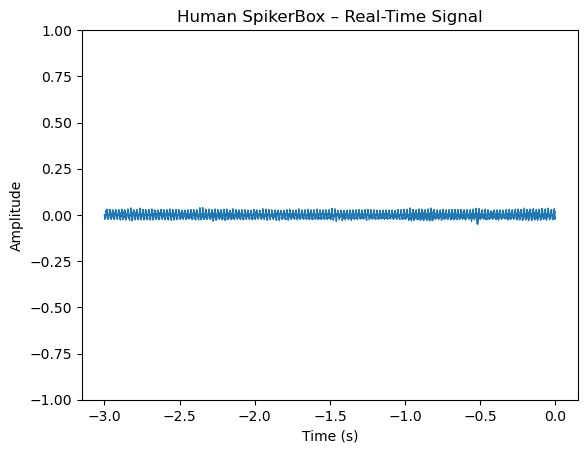

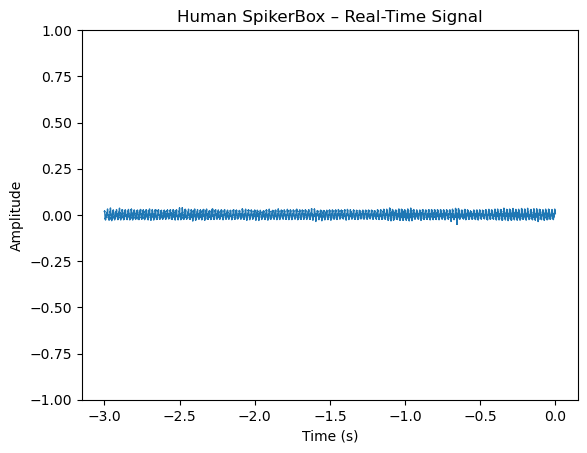

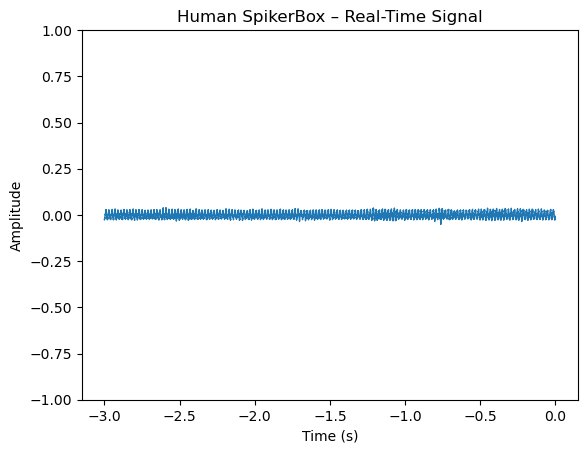

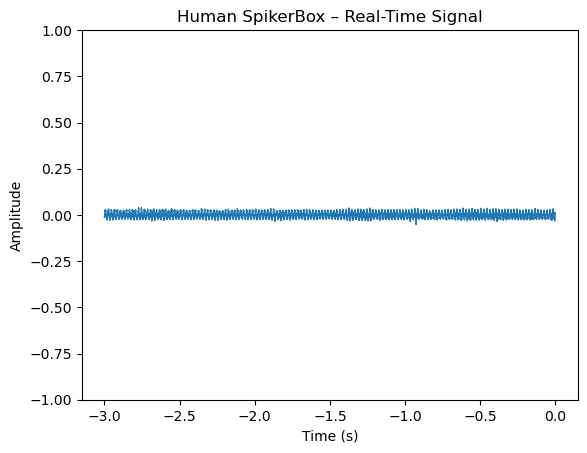

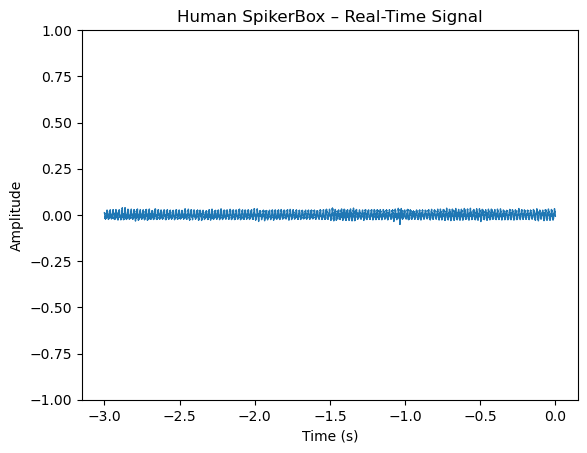

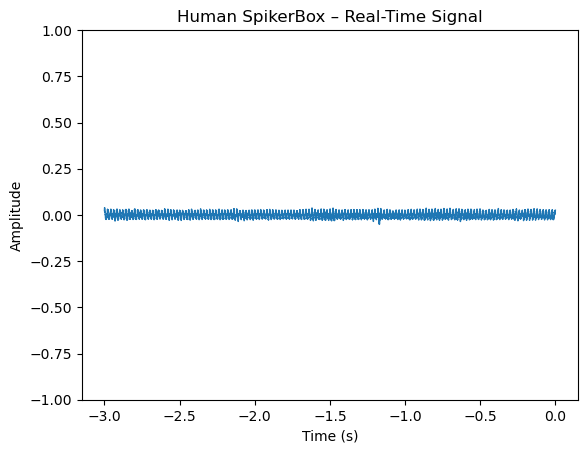

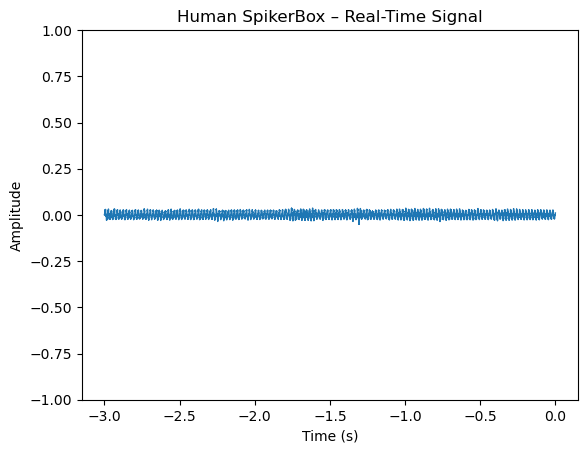

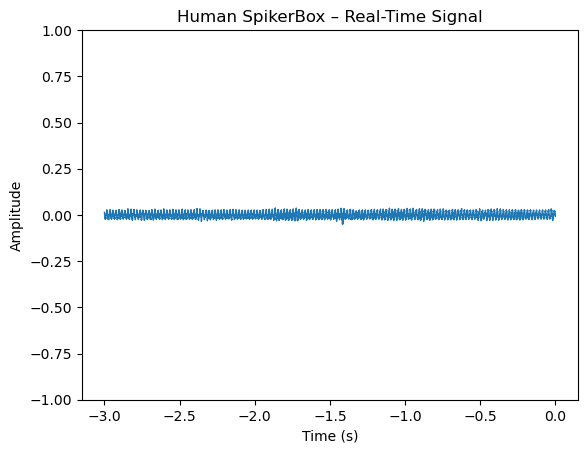

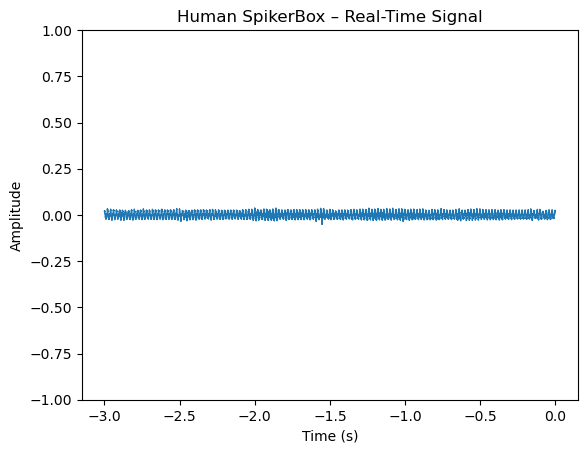

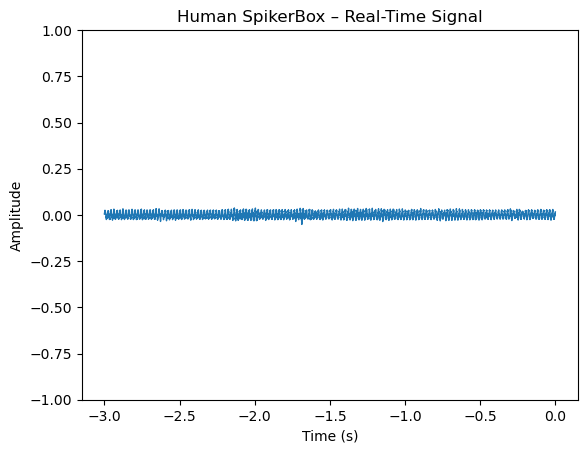

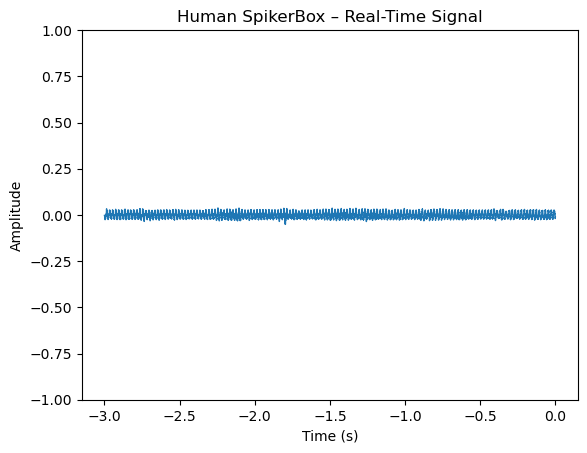

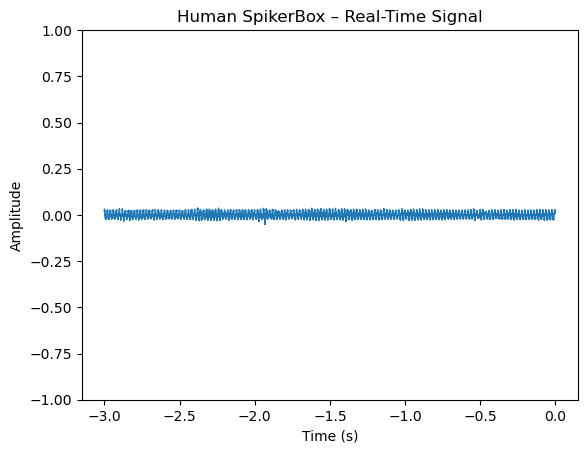

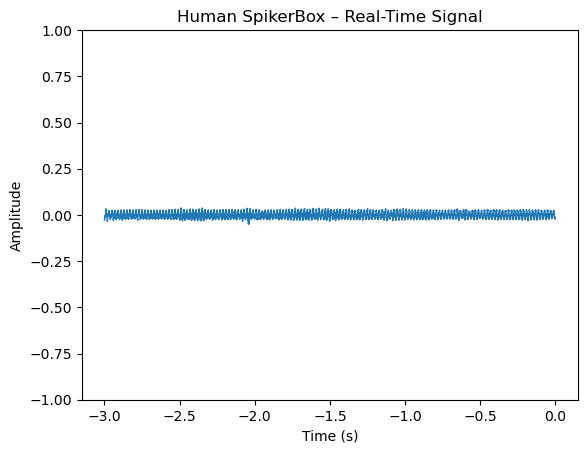

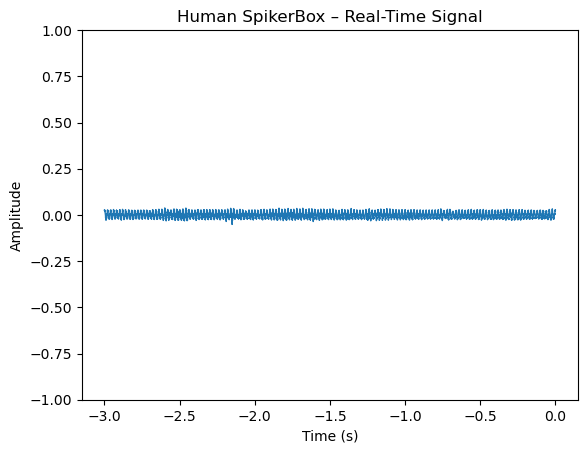

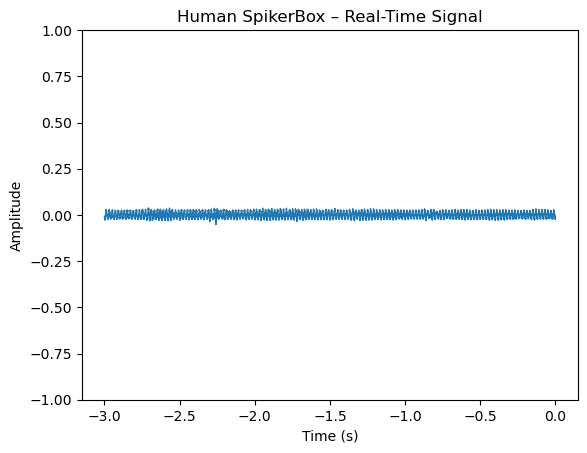

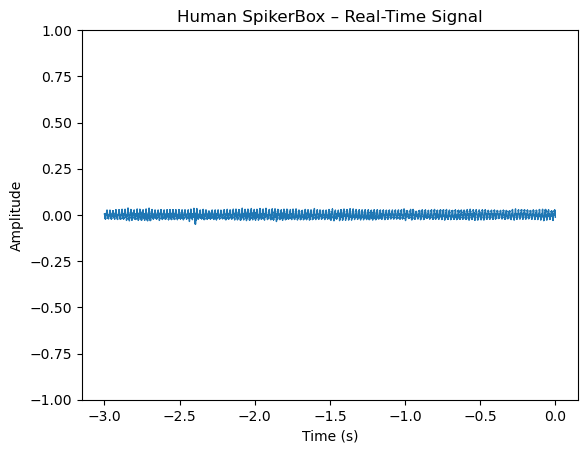

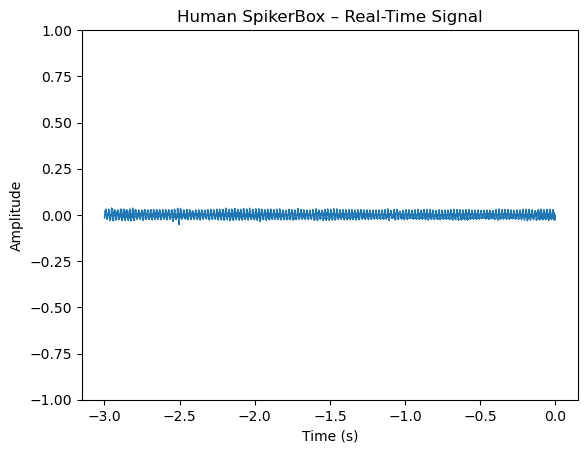

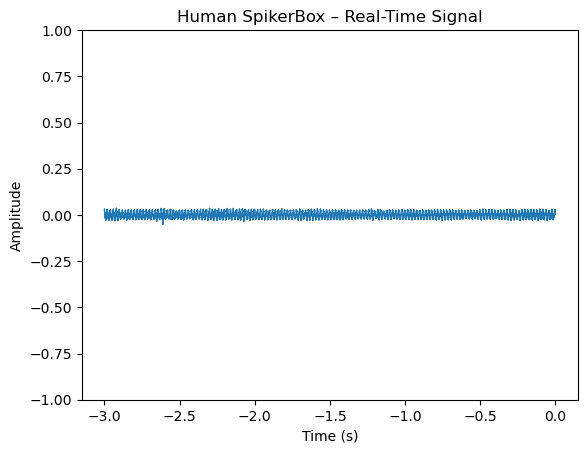

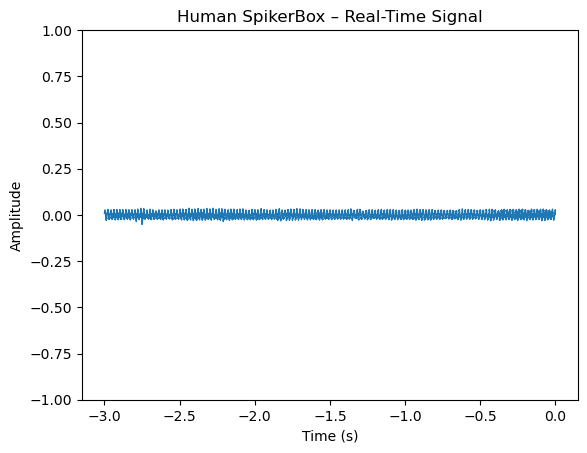

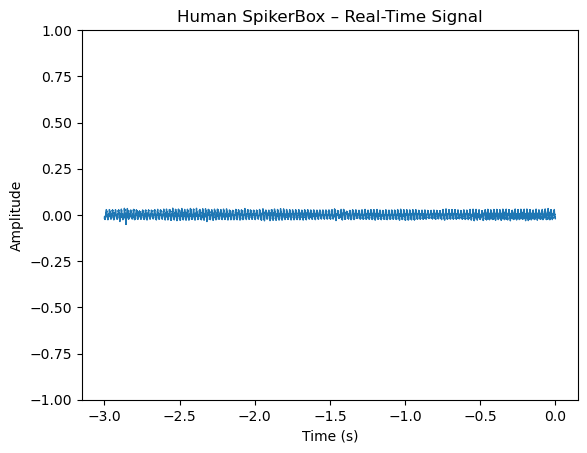

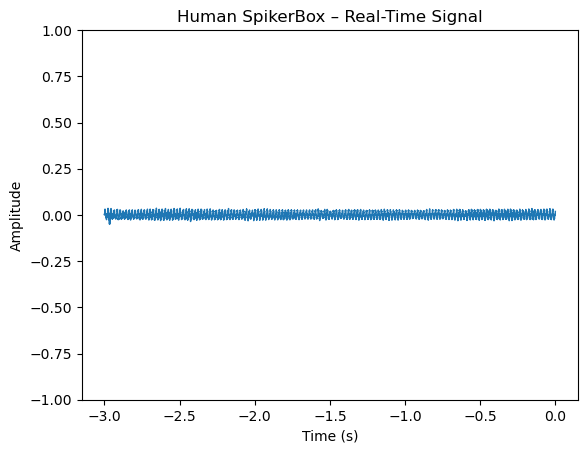

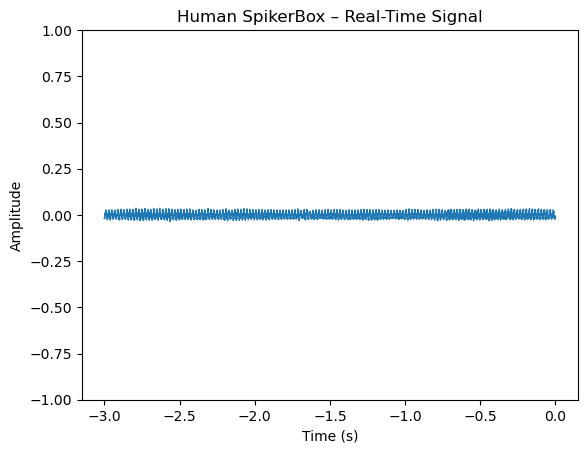

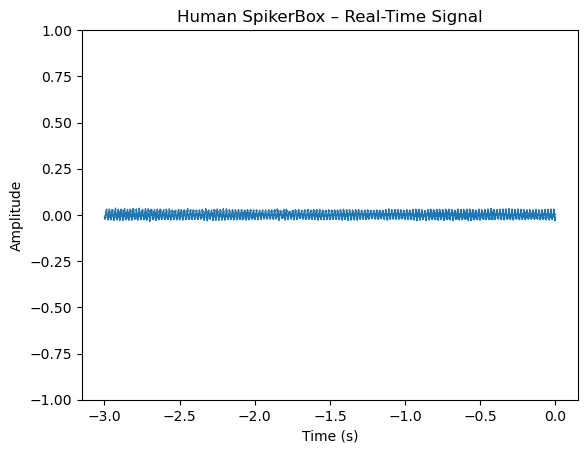

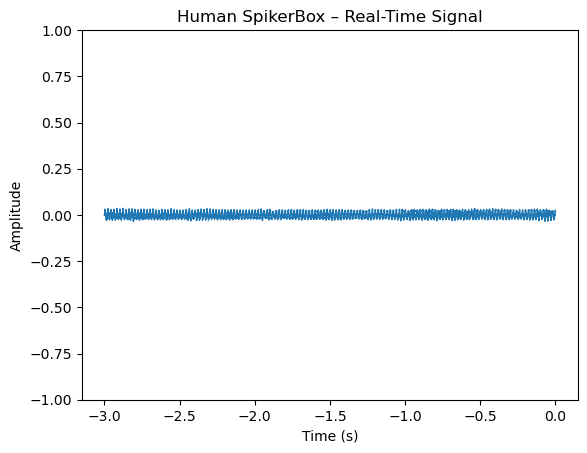

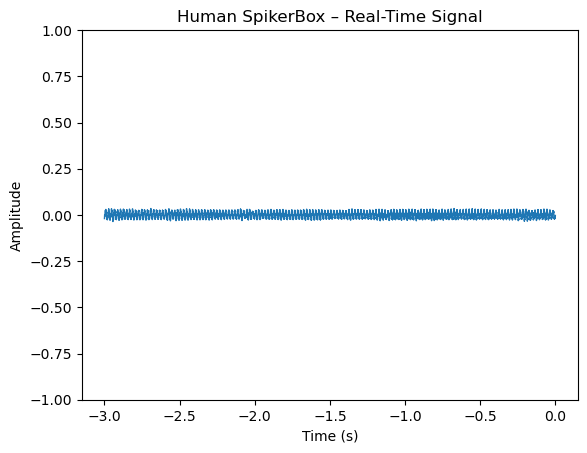

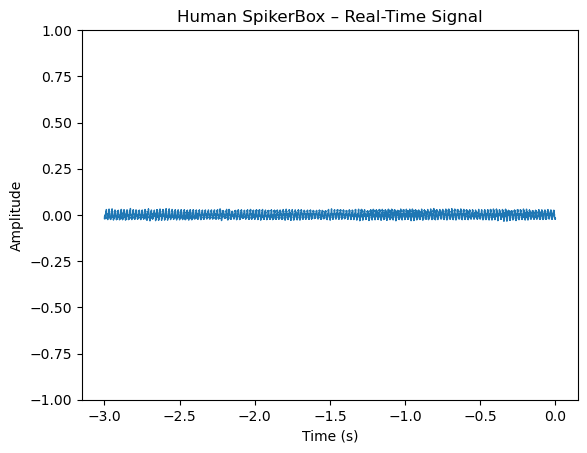

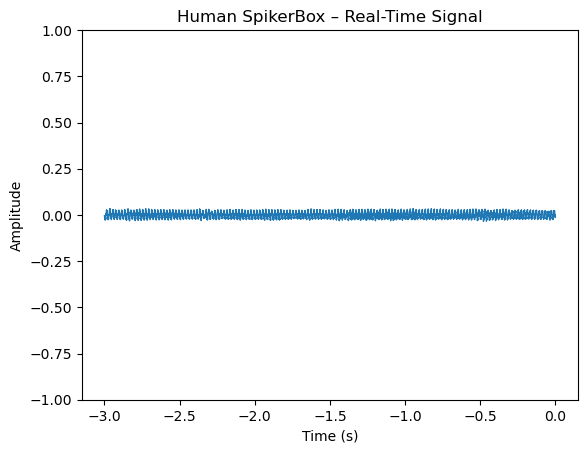

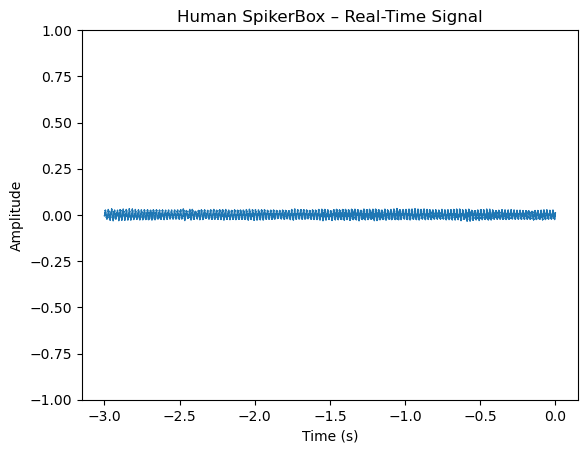

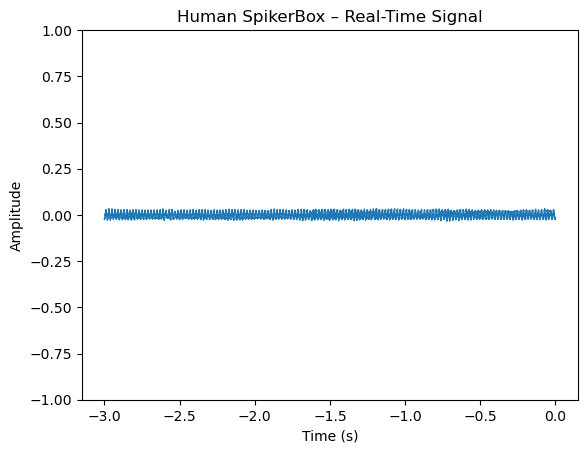

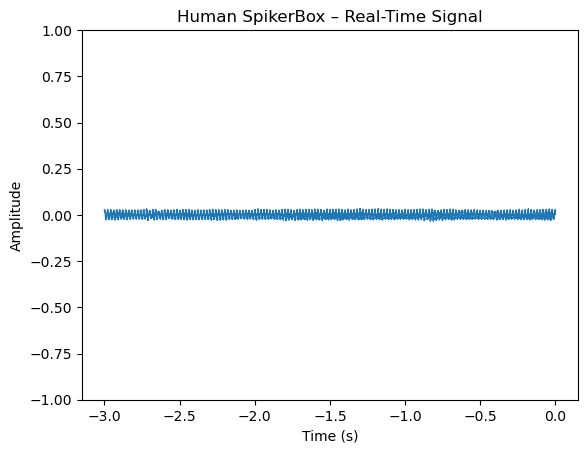

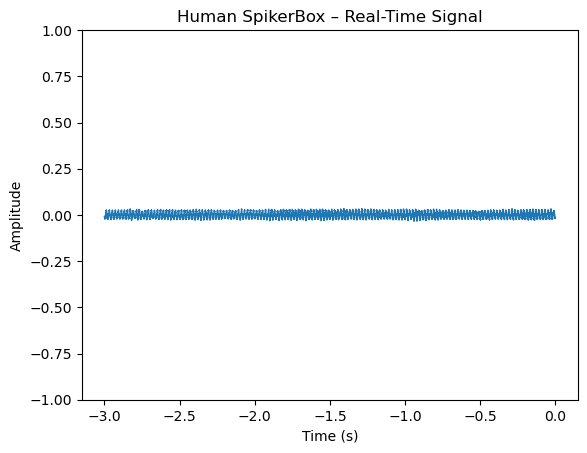

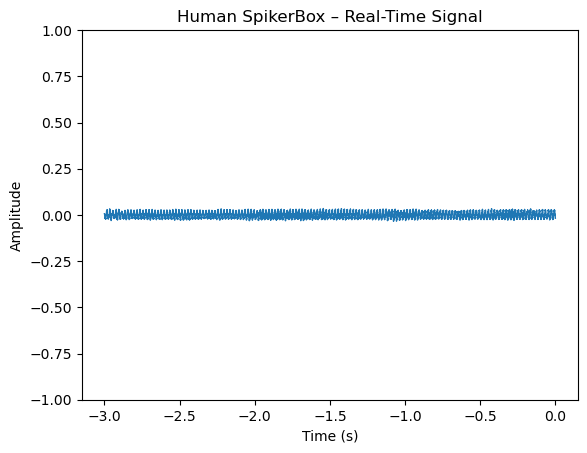

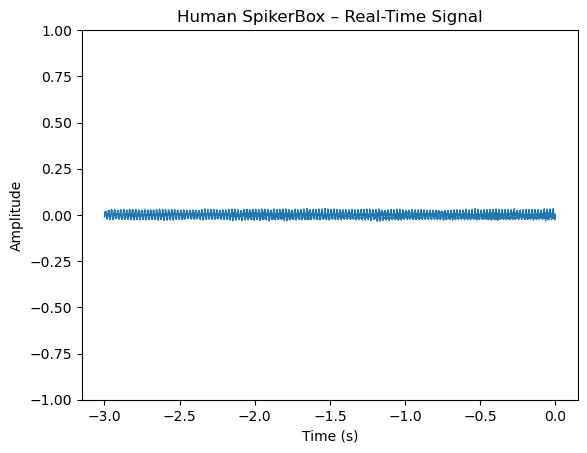

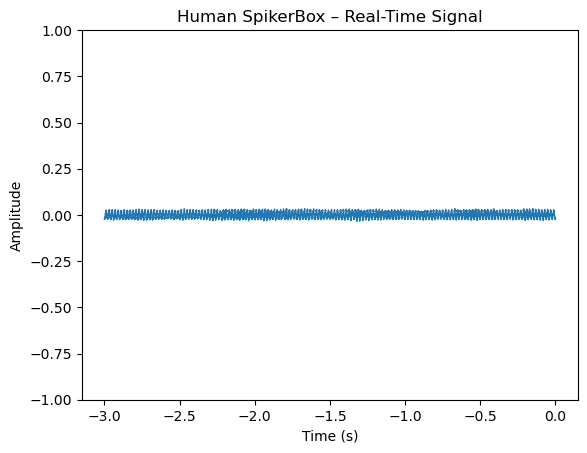

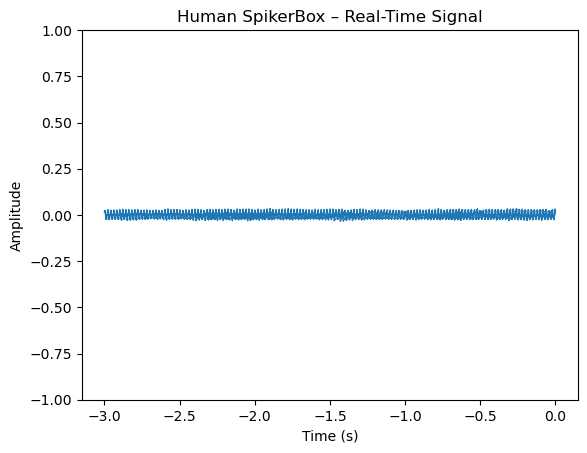

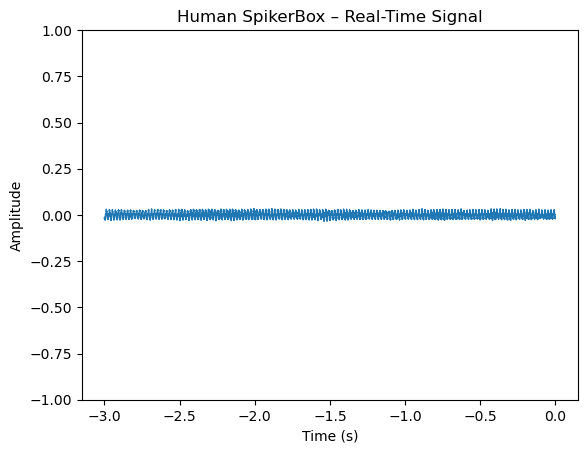

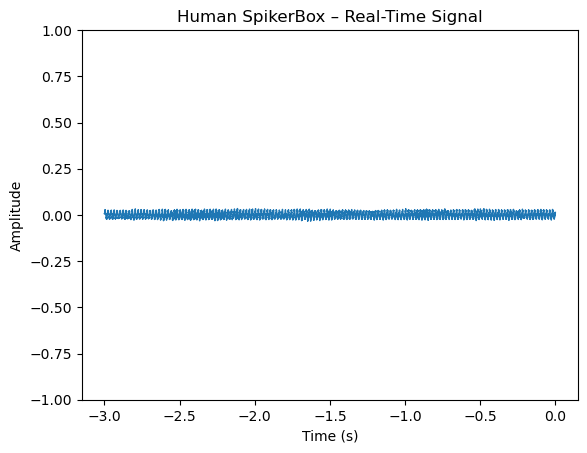

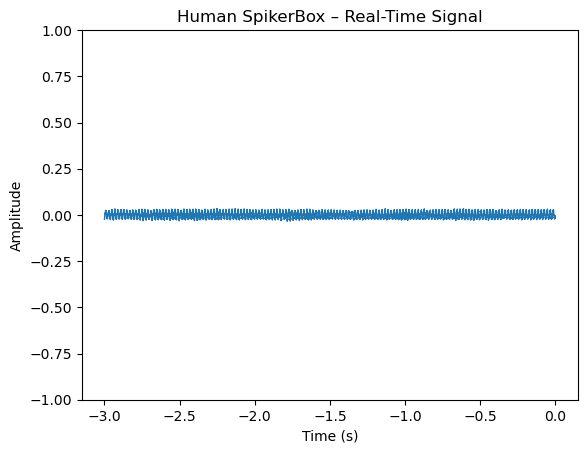

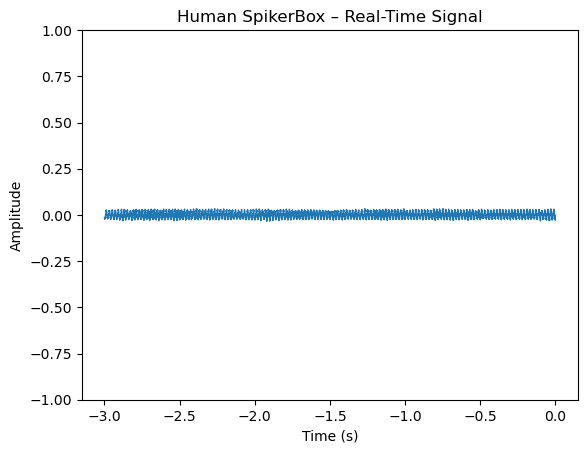

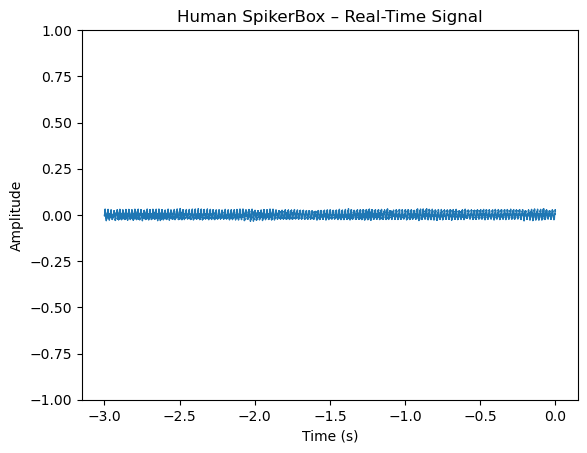

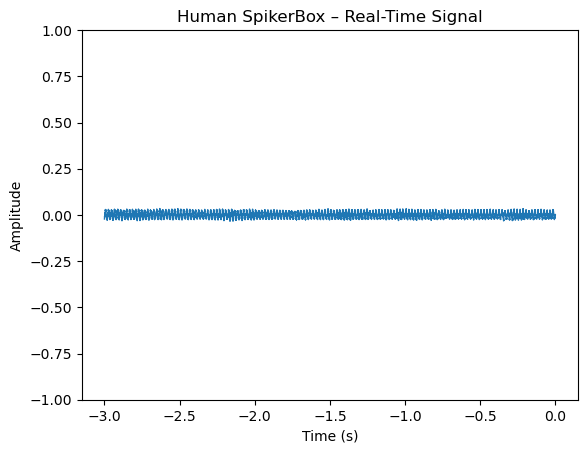

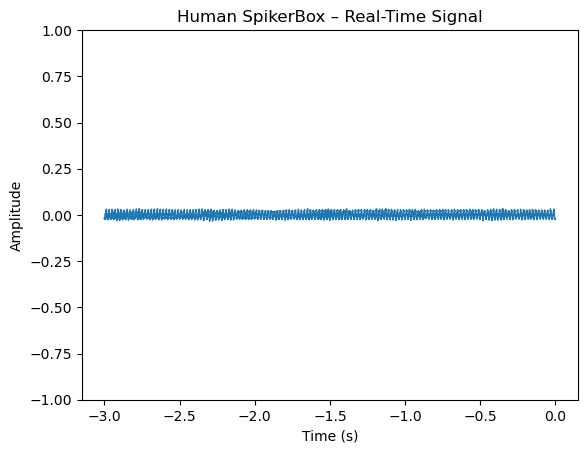

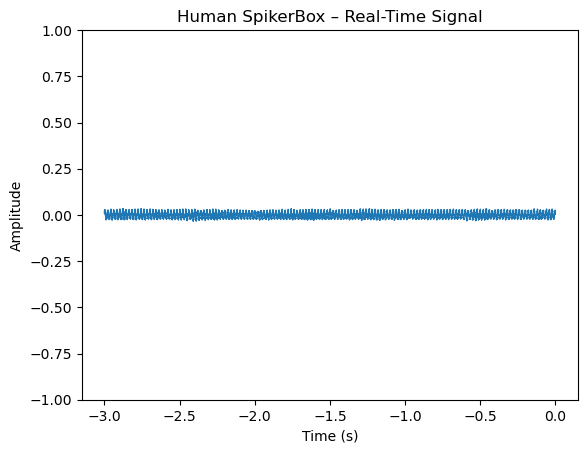

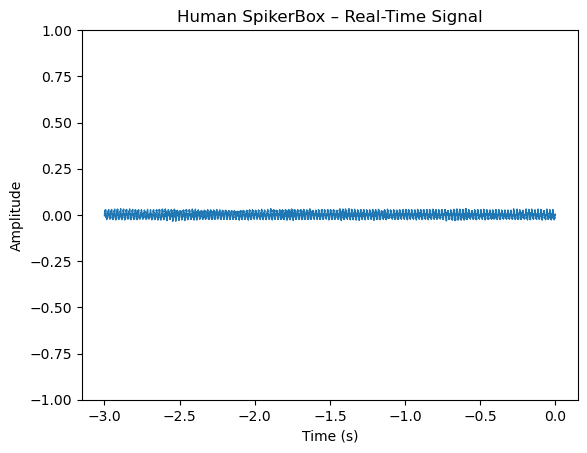

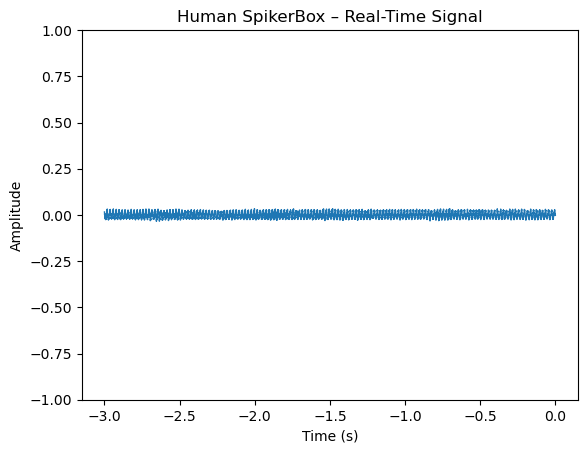

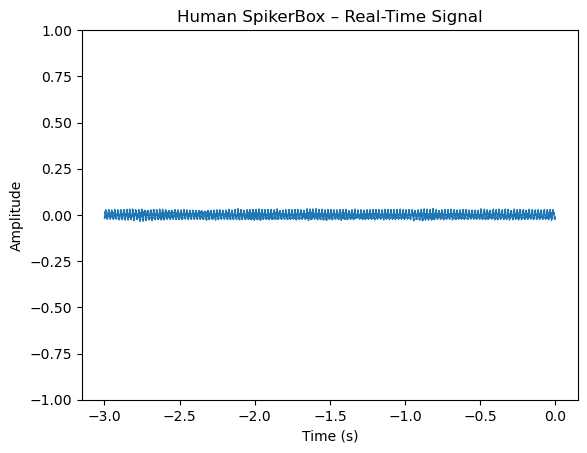

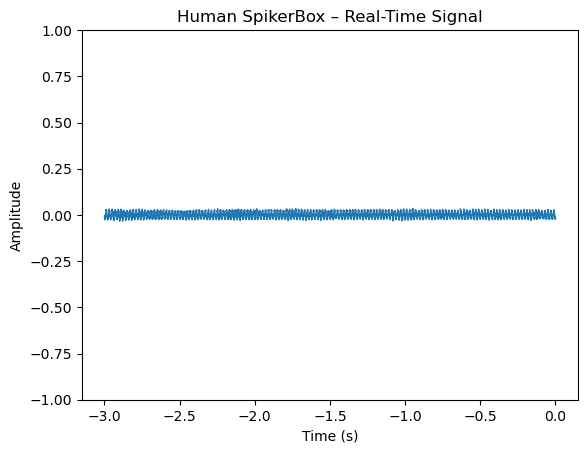

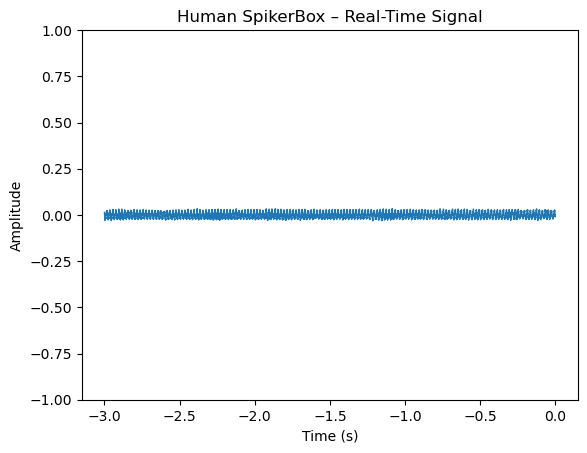

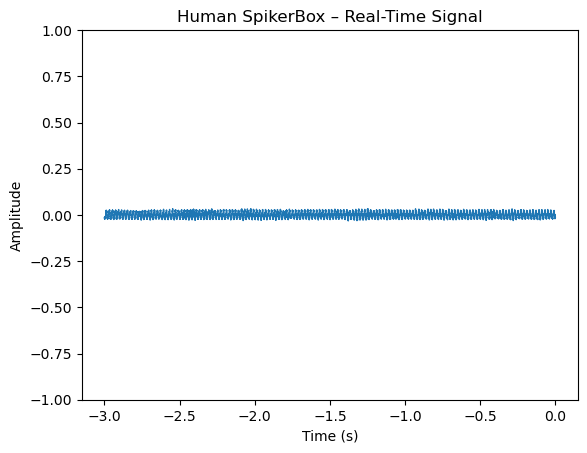

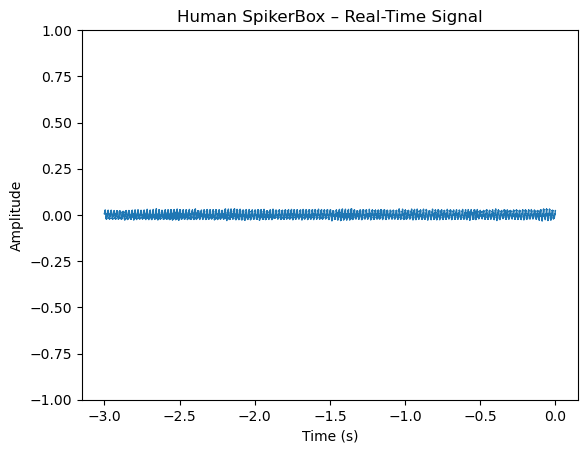

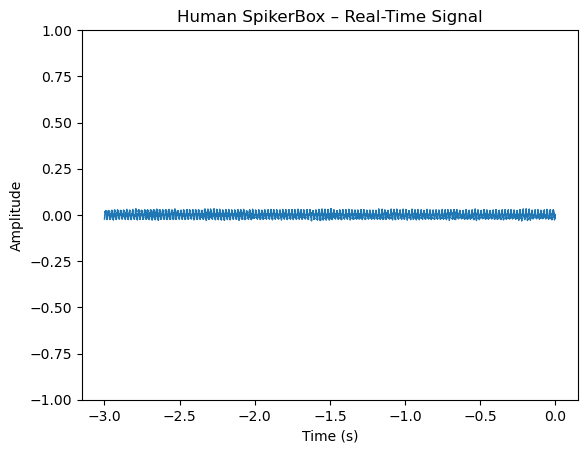

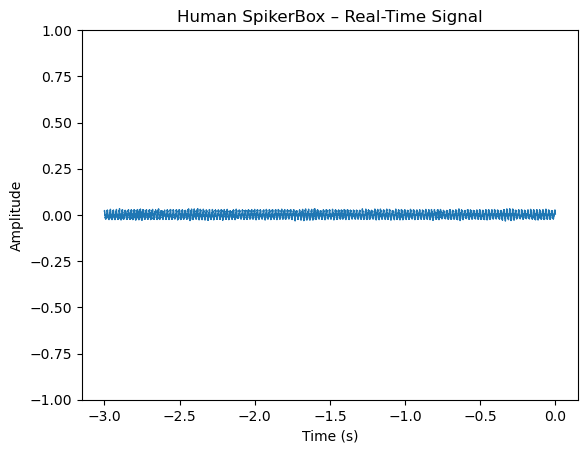

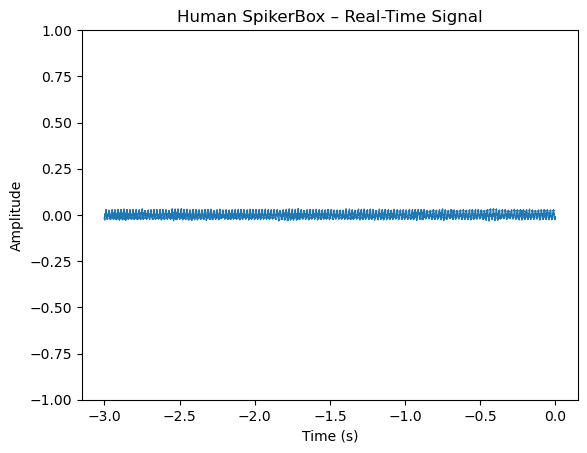

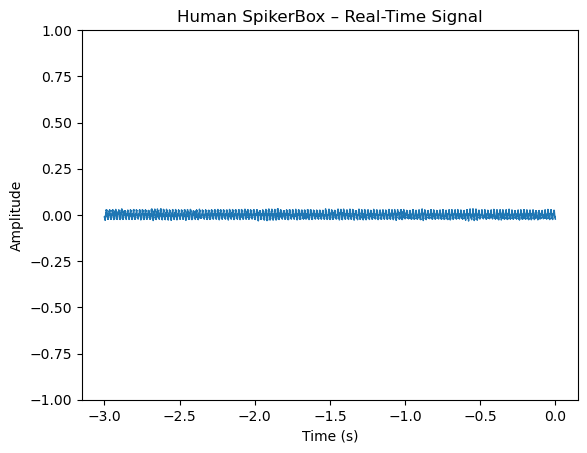

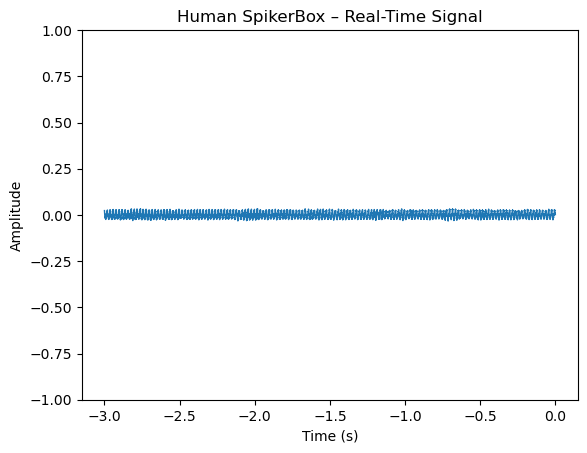

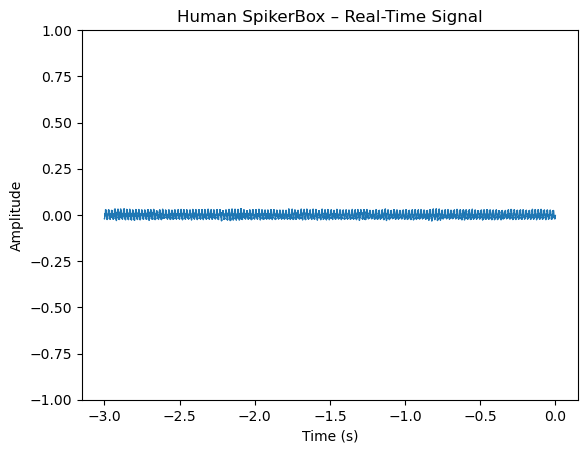

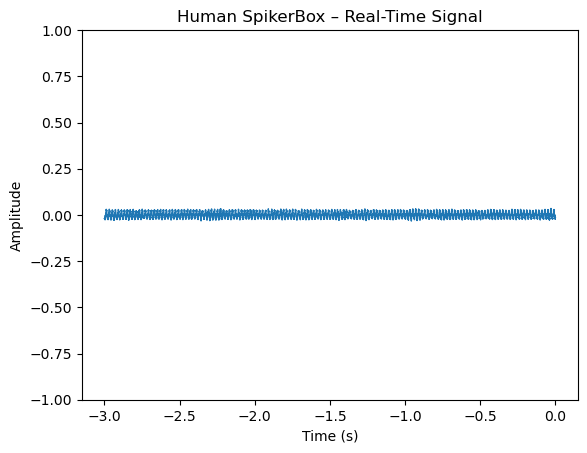

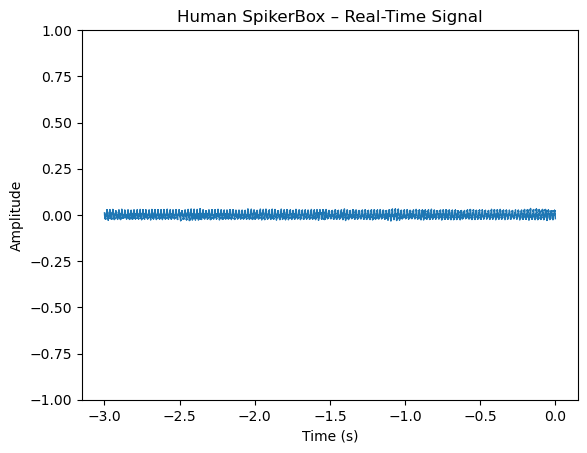

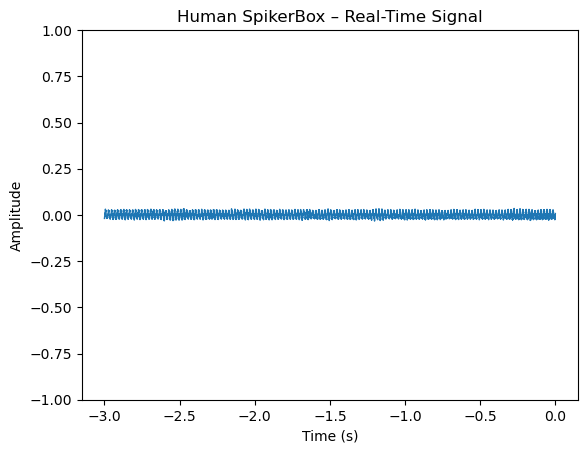

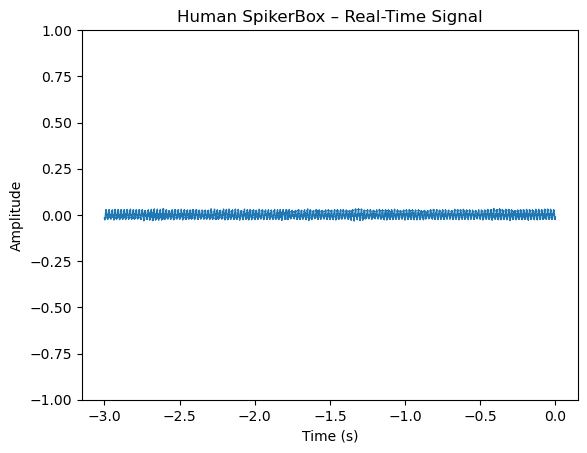

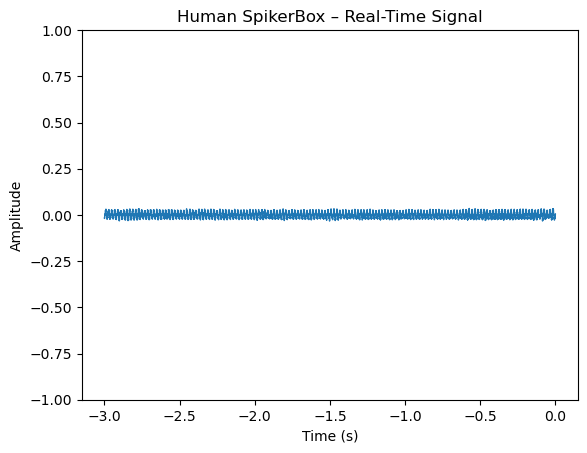

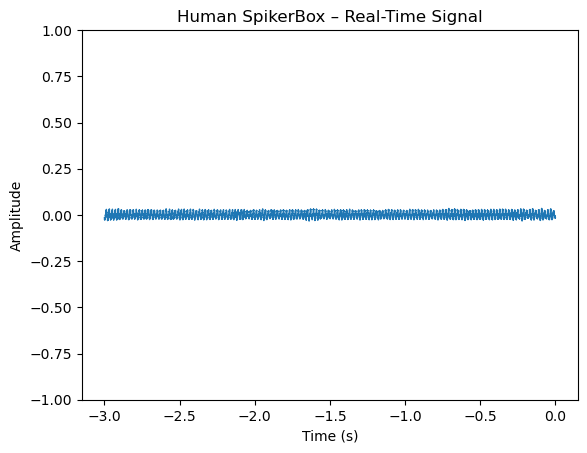

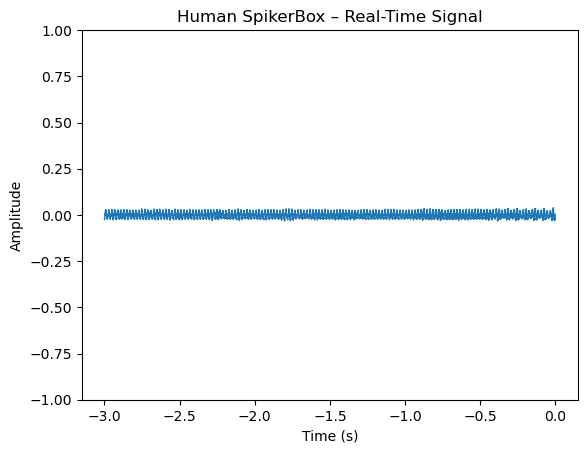

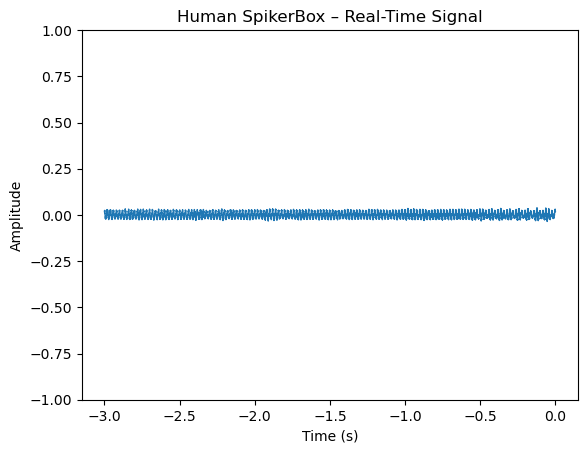

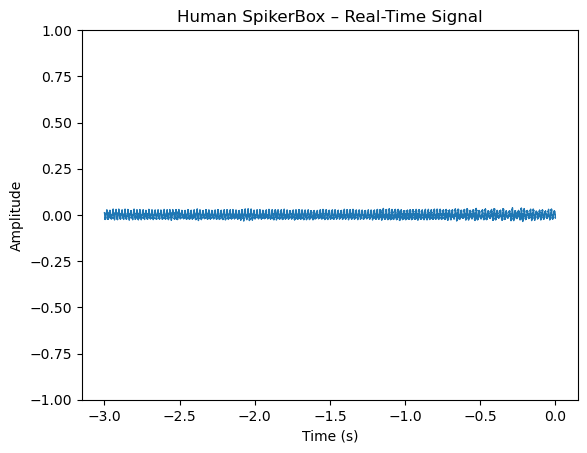

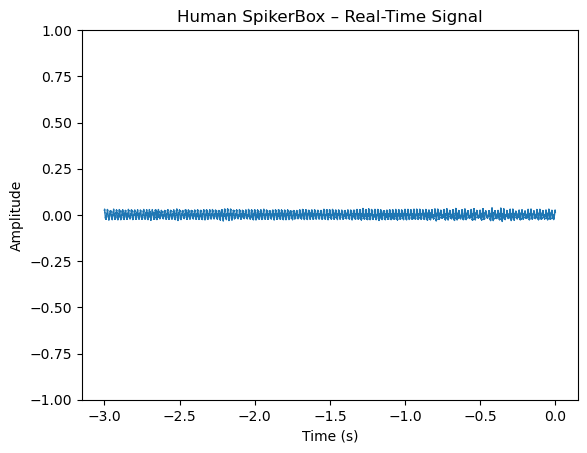

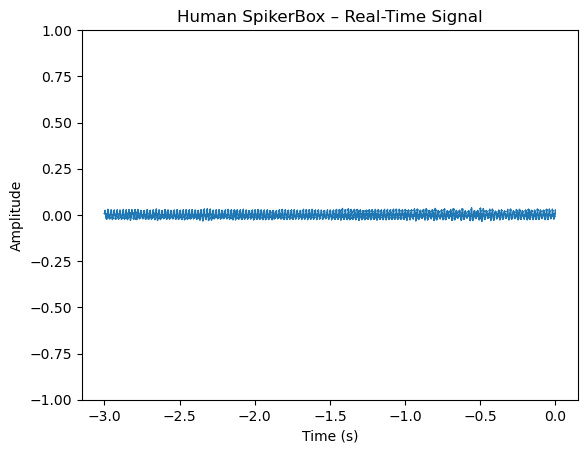

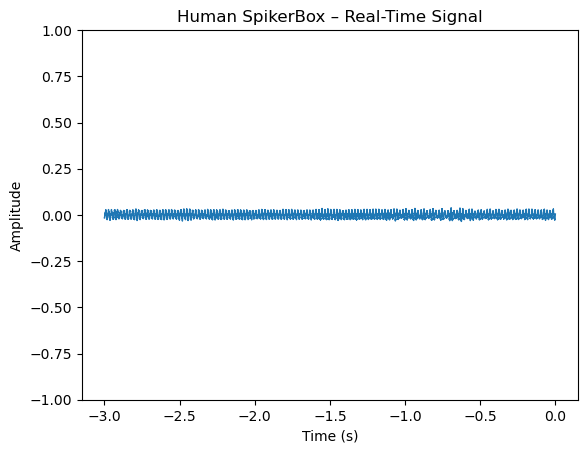

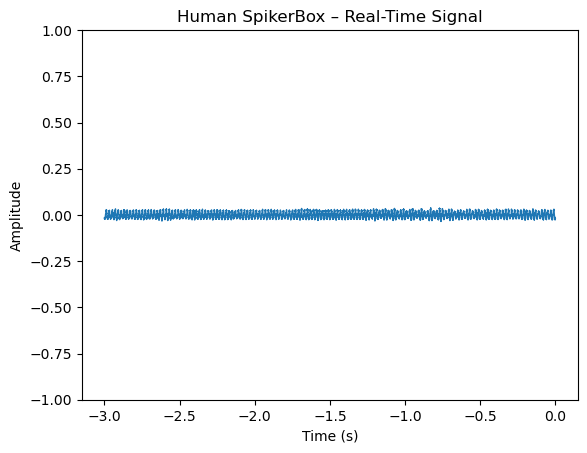

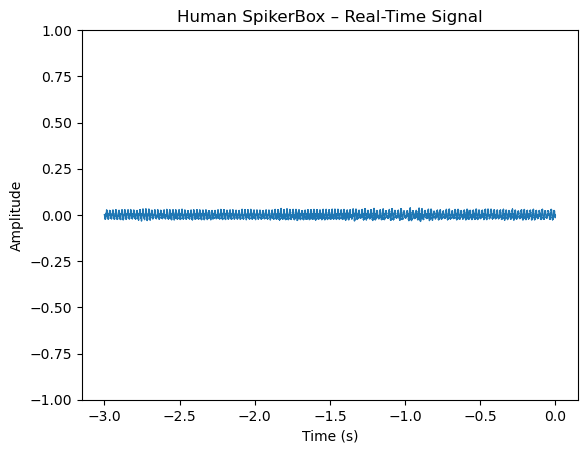

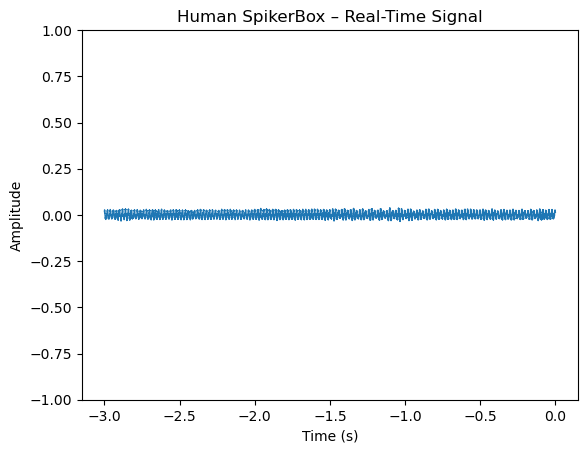

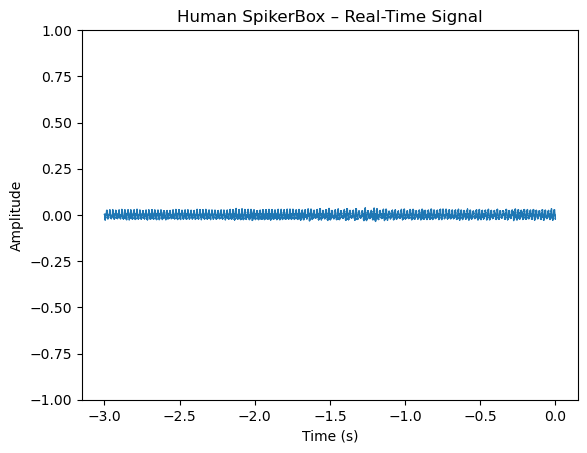

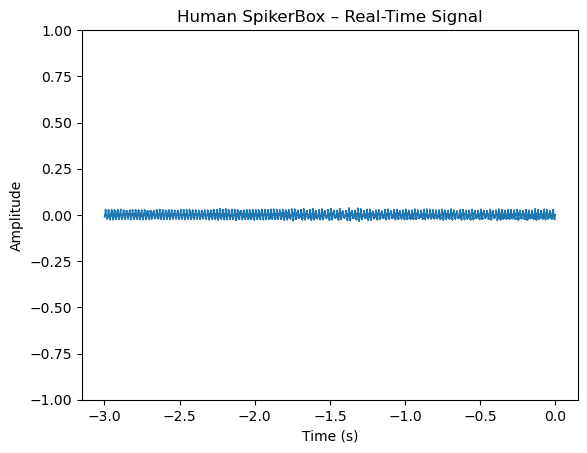

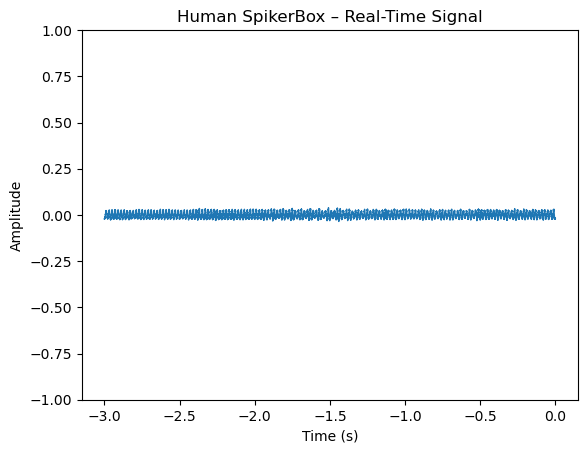

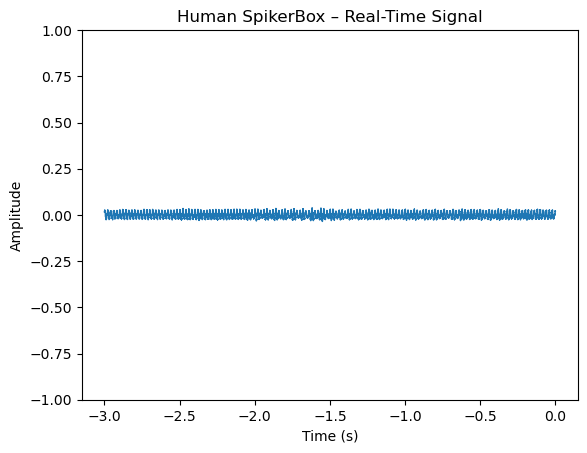

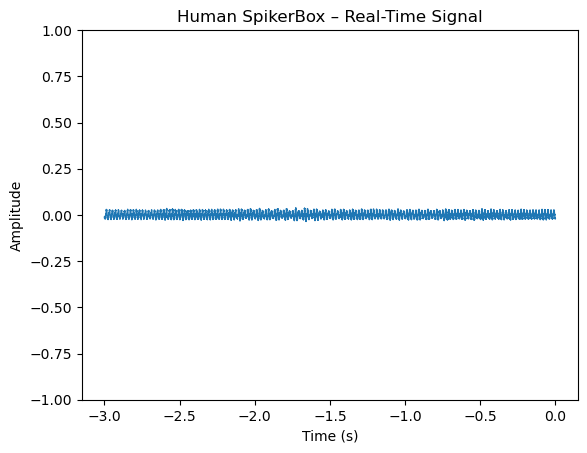

KeyboardInterrupt: 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd
import threading
from collections import deque
import time

# ===== CONFIG =====
FS = 10000          # Try 44100 if 10k fails
WINDOW_SEC = 3
DISPLAY_SIZE = FS * WINDOW_SEC
DEVICE_INDEX = None  # set after querying devices

sample_buffer = deque(maxlen=DISPLAY_SIZE)

# ===== AUDIO CALLBACK =====
def audio_callback(indata, frames, time_info, status):
    if status:
        print(status)
    sample_buffer.extend(indata[:, 0])

# ===== THREAD START =====
def start_stream():
    with sd.InputStream(
        samplerate=FS,
        channels=1,
        device=DEVICE_INDEX,
        callback=audio_callback
    ):
        while True:
            time.sleep(0.1)

thread = threading.Thread(target=start_stream, daemon=True)
thread.start()

# ===== PLOT =====
xi = np.linspace(-WINDOW_SEC, 0, DISPLAY_SIZE)
plt.ion()

while True:
    if len(sample_buffer) == DISPLAY_SIZE:
        yi = np.array(sample_buffer)

        plt.clf()
        plt.ylim(-1, 1)  # audio-normalized
        plt.plot(xi, yi, linewidth=1)
        plt.title("Human SpikerBox – Real-Time Signal")
        plt.xlabel("Time (s)")
        plt.ylabel("Amplitude")
        plt.pause(0.01)


KeyboardInterrupt: 

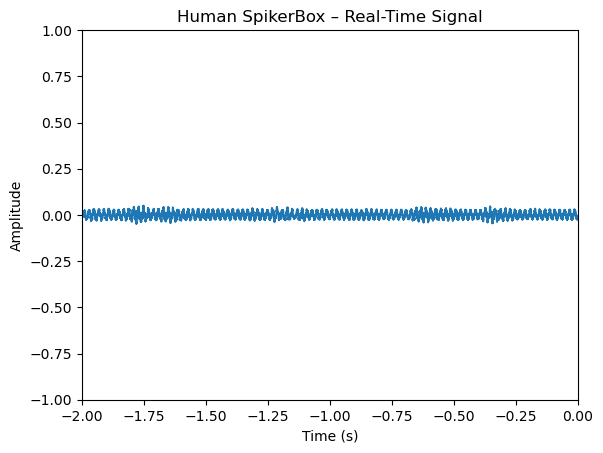

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd
import threading
import time
from collections import deque

# ================= CONFIG =================
FS = 44100              # or 10000
WINDOW_SEC = 2
DISPLAY_SIZE = FS * WINDOW_SEC
DEVICE_INDEX = None     # set explicitly after sd.query_devices()

buffer = deque(maxlen=DISPLAY_SIZE)

# ================= AUDIO CALLBACK =================
def audio_callback(indata, frames, time_info, status):
    if status:
        print(status)
    buffer.extend(indata[:, 0])

# ================= STREAM THREAD =================
def start_stream():
    with sd.InputStream(
        samplerate=FS,
        channels=1,
        device=DEVICE_INDEX,
        callback=audio_callback
    ):
        while True:
            time.sleep(0.1)

threading.Thread(target=start_stream, daemon=True).start()

# ================= PLOT SETUP =================
x = np.linspace(-WINDOW_SEC, 0, DISPLAY_SIZE)

fig, ax = plt.subplots()
line, = ax.plot(x, np.zeros(DISPLAY_SIZE))

ax.set_ylim(-1, 1)
ax.set_xlim(-WINDOW_SEC, 0)
ax.set_title("Human SpikerBox – Real-Time Signal")
ax.set_xlabel("Time (s)")
ax.set_ylabel("Amplitude")

# ================= UPDATE LOOP =================
while True:
    if len(buffer) == DISPLAY_SIZE:
        y = np.array(buffer)
        line.set_ydata(y)
        fig.canvas.draw_idle()
        time.sleep(0.02)
